# Introduction

Author Name: Ade William Tabrani

Context and Model Objective:
  - A superstore is planning for the year-end sale. They want to launch a new offer - gold membership, that gives a 20% discount on all purchases, for only 499 USD which is 999 USD on other days. It will be valid only for existing customers and the campaign through phone calls is currently being planned for them. The management feels that the best way to reduce the cost of the campaign is to make a predictive model which will classify customers who might purchase the offer.
  - Objective - The superstore wants a a prediction model to predict whether a customer will give a positive response. Dataset is obtained from [Kaggle](https://www.kaggle.com/datasets/ahsan81/superstore-marketing-campaign-dataset)

  For this model, the positives will be 'Will Buy Membership' and the negatives will be 'Will Not Buy Membership'.  False positives may not be as taxing since there is still a chance that the person who got the offer is willing to buy--you never really know. But, false negatives are more costly since we're losing on a potential membership buyer.
  
  Hence, recall will be the prioritized as we want to minimize false negatives. F1-score will also be used in tandem for 'middle path' between precision and recall.

# Lib Loading

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statistics
from dateutil import relativedelta
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE
from sklearn.neighbors import KNeighborsClassifier
from sklearn import neighbors
from sklearn.svm import SVC
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, confusion_matrix, f1_score
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, cross_val_score
from sklearn.ensemble import AdaBoostClassifier
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
import pickle

# Data Loading

In [ ]:
# laod data to pandas dataframe
df = pd.read_csv('https://raw.githubusercontent.com/AdeWT/Superstore-Membership-Predictor-Project-AdeWT/main/superstore_data.csv')

Description of data (from Kaggle dataset source):

The data is of last year's campaign.

- `Response` (target) - 1 if customer accepted the offer in the last campaign, 0 otherwise
- `ID` - Unique ID of each customer
- `Year_Birth` - Age of the customer
- `Complain` - 1 if the customer complained in the last 2 years
- `Dt_Customer` - date of customer's enrollment with the company
- `Education` - customer's level of education
- `Marital` - customer's marital status
- `Kidhome` - number of small children in customer's household
- `Teenhome` - number of teenagers in customer's household
- `Income` - customer's yearly household income
- `MntFishProducts` - the amount spent on fish products in the last 2 years
- `MntMeatProducts` - the amount spent on meat products in the last 2 years
- `MntFruits` - the amount spent on fruits products in the last 2 years
- `MntSweetProducts` - amount spent on sweet products in the last 2 years
- `MntWines` - the amount spent on wine products in the last 2 years
- `MntGoldProds` - the amount spent on gold products in the last 2 years
- `NumDealsPurchases` - number of purchases made with discount
- `NumCatalogPurchases` - number of purchases made using catalog (buying goods to be shipped through the mail)
- `NumStorePurchases` - number of purchases made directly in stores
- `NumWebPurchases` - number of purchases made through the company's website
- `NumWebVisitsMonth` - number of visits to company's website in the last month
- `Recency` - number of days since the last purchase

In [ ]:
# see 10 first

df.head(10)

,Id,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain
0,1826,1970,Graduation,Divorced,84835.0,0,0,6/16/2014,0,189,...,111,189,218,1,4,4,6,1,1,0
1,1,1961,Graduation,Single,57091.0,0,0,6/15/2014,0,464,...,7,0,37,1,7,3,7,5,1,0
2,10476,1958,Graduation,Married,67267.0,0,1,5/13/2014,0,134,...,15,2,30,1,3,2,5,2,0,0
3,1386,1967,Graduation,Together,32474.0,1,1,11/5/2014,0,10,...,0,0,0,1,1,0,2,7,0,0
4,5371,1989,Graduation,Single,21474.0,1,0,8/4/2014,0,6,...,11,0,34,2,3,1,2,7,1,0
5,7348,1958,PhD,Single,71691.0,0,0,3/17/2014,0,336,...,240,32,43,1,4,7,5,2,1,0
6,4073,1954,2n Cycle,Married,63564.0,0,0,1/29/2014,0,769,...,15,34,65,1,10,10,7,6,1,0
7,1991,1967,Graduation,Together,44931.0,0,1,1/18/2014,0,78,...,0,0,7,1,2,1,3,5,0,0
8,4047,1954,PhD,Married,65324.0,0,1,11/1/2014,0,384,...,21,32,5,3,6,2,9,4,0,0
9,9477,1954,PhD,Married,65324.0,0,1,11/1/2014,0,384,...,21,32,5,3,6,2,9,4,0,0


In [ ]:
# see ten last

df.tail(10)

,Id,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain
2230,3363,1974,2n Cycle,Married,20130.0,0,0,3/17/2014,99,0,...,7,6,12,1,1,0,3,8,0,0
2231,8595,1973,Graduation,Widow,42429.0,0,1,11/2/2014,99,55,...,2,0,4,2,1,1,3,5,0,0
2232,7232,1973,Graduation,Widow,42429.0,0,1,11/2/2014,99,55,...,2,0,4,2,1,1,3,5,0,0
2233,7829,1900,2n Cycle,Divorced,36640.0,1,0,9/26/2013,99,15,...,7,4,25,1,2,1,2,5,0,1
2234,9977,1973,Graduation,Divorced,78901.0,0,1,9/17/2013,99,321,...,33,26,34,3,9,3,5,4,0,0
2235,10142,1976,PhD,Divorced,66476.0,0,1,7/3/2013,99,372,...,47,48,78,2,5,2,11,4,0,0
2236,5263,1977,2n Cycle,Married,31056.0,1,0,1/22/2013,99,5,...,3,8,16,1,1,0,3,8,0,0
2237,22,1976,Graduation,Divorced,46310.0,1,0,3/12/2012,99,185,...,15,5,14,2,6,1,5,8,0,0
2238,528,1978,Graduation,Married,65819.0,0,0,11/29/2012,99,267,...,149,165,63,1,5,4,10,3,0,0
2239,4070,1969,PhD,Married,94871.0,0,2,1/9/2012,99,169,...,188,0,144,1,8,5,4,7,1,0


In [ ]:
# see info on datatypes, number of columns, rows, etc.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Id                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

Insight =
- There are 2240 datapoints
- There are 20 usable columns for machine learning with 1 target column, with most being in integer or float format already, with only 3 in object form that will need encoding.
- There are empty data in income data
- There may be some high correlation between some features, such as NumDealsPurchases and NumStorePurchases

# Data Exploration / Exploratory Data Analysis

## Check for empties and duplicates

In [ ]:
# won't be using id so let's drop it for now
df.drop('Id', axis='columns', inplace=True)
df.head() # to see if it's dropped

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain
0,1970,Graduation,Divorced,84835.0,0,0,6/16/2014,0,189,104,...,111,189,218,1,4,4,6,1,1,0
1,1961,Graduation,Single,57091.0,0,0,6/15/2014,0,464,5,...,7,0,37,1,7,3,7,5,1,0
2,1958,Graduation,Married,67267.0,0,1,5/13/2014,0,134,11,...,15,2,30,1,3,2,5,2,0,0
3,1967,Graduation,Together,32474.0,1,1,11/5/2014,0,10,0,...,0,0,0,1,1,0,2,7,0,0
4,1989,Graduation,Single,21474.0,1,0,8/4/2014,0,6,16,...,11,0,34,2,3,1,2,7,1,0


Insight = Cust ID successfully dropped

In [ ]:
#check empty fields
df.isna().sum()

Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
Response                0
Complain                0
dtype: int64

Insight = there are 24 null data in income data. Possible the person taking the survey don't want to disclose their income. We can drop rows with empty data since it's only 24 rows and we'd still have 2200-something.

In [ ]:
#drop data with empty income info
df.dropna(axis='rows',inplace=True)

In [ ]:
# check duplicates
df.duplicated().value_counts()

False    2034
True      182
dtype: int64

Insight = there are 182 duplicated data. Let's drop those as they tell the same story, in this case, repeated 181 times. It's hardly likely for the data to be of different people/accounts--182 people having the same amount of purchases, income, amount of kids/teens at home, education, etc. is very unlikely.

In [ ]:
# drop duplicates
df.drop_duplicates(inplace=True)

In [ ]:
# check if duplicates dropped
df.duplicated().value_counts()

False    2034
dtype: int64

Insight = duplicates have been dropped

## Check Categorical columns

In [ ]:
# Making plotter for categorical data

def diagnostic_plots_categ(df1, variable):

    # Define figure size
    plt.figure(figsize=(20, 10))

    # Barh
    plt.subplot(1, 2, 1)
    df1[variable].value_counts().sort_values(ascending=True).plot(kind='barh')
    plt.title(f'Bar chart of {variable}')

    # Pie plot
    plt.subplot(1, 2, 2)
    df1[variable].value_counts().sort_values(ascending=True).plot(kind = 'pie', autopct="%.1f%%")
    plt.title(f'Pie chart of {variable}')

    plt.show()

### Check target variable

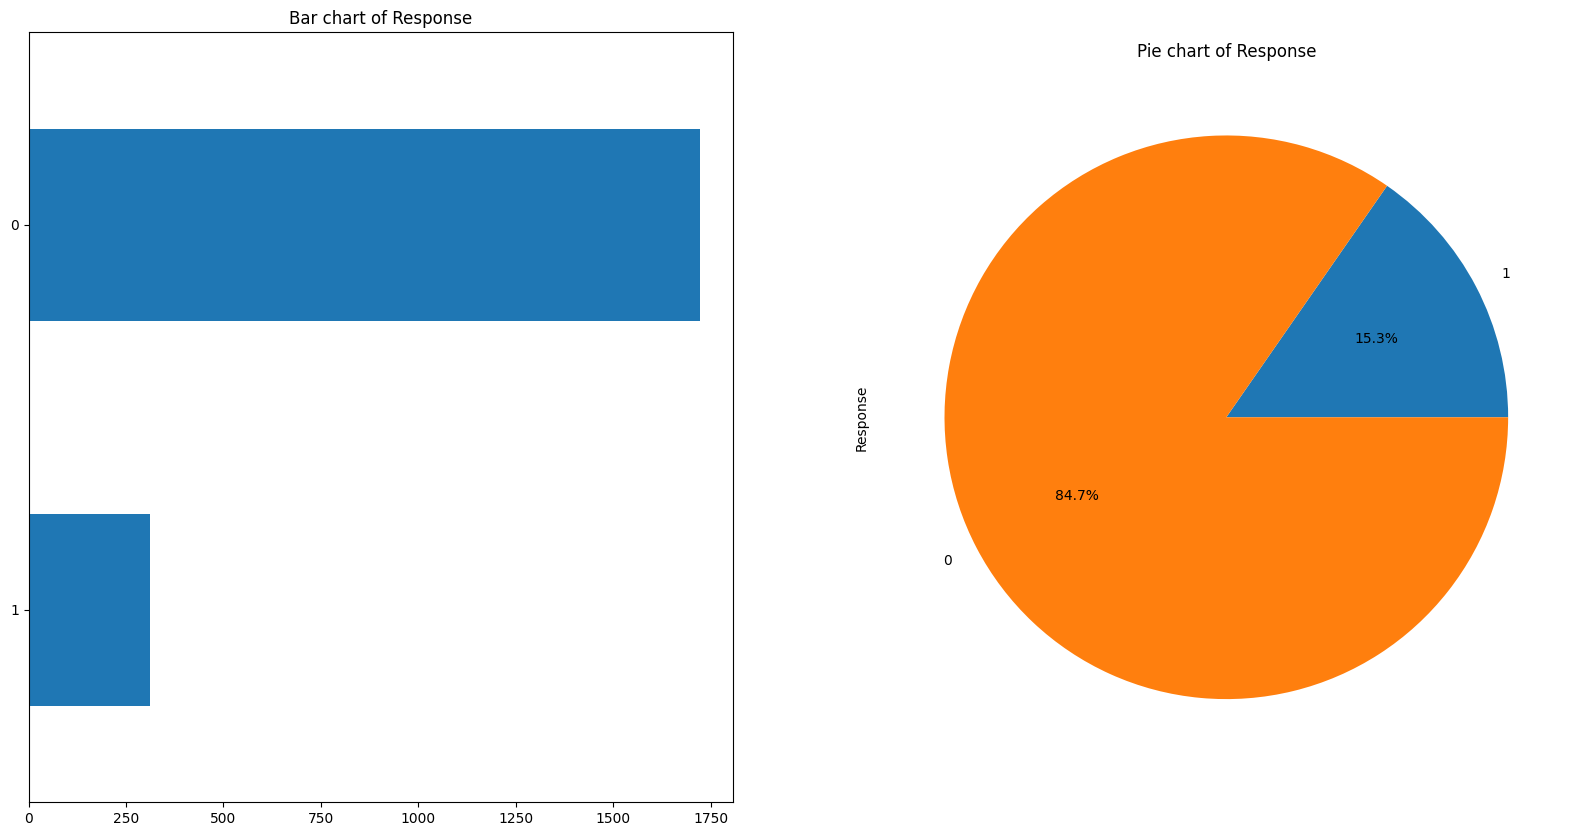

In [ ]:
diagnostic_plots_categ(df, 'Response')

Insight = target is unbalanced with only around 15.3% accepting the membership offer. We might need to do balancing act later on to get better model.

### Check features

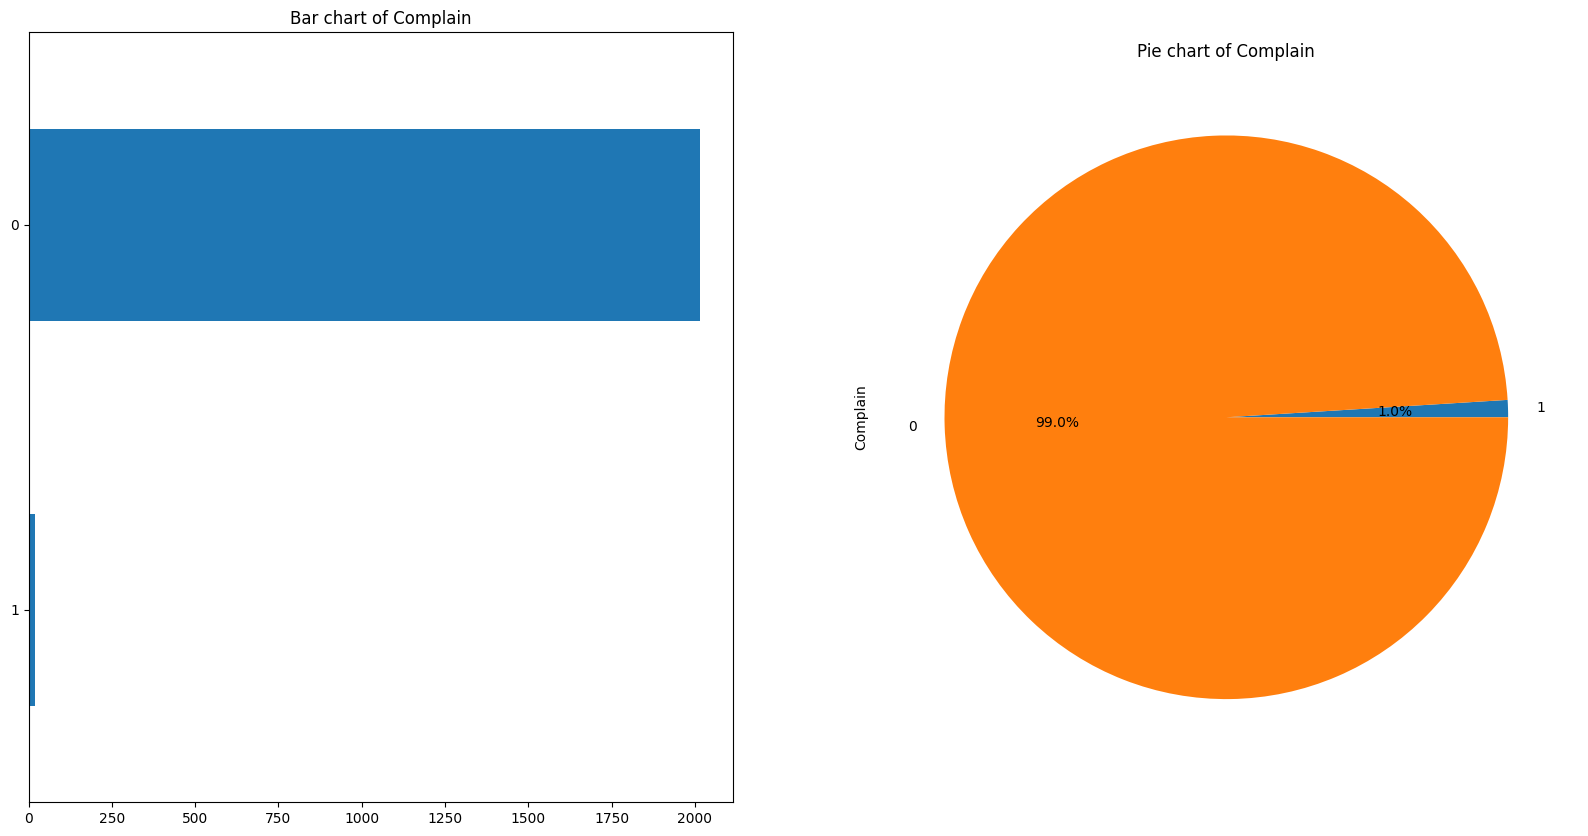

In [ ]:
diagnostic_plots_categ(df, 'Complain')

Insight = only 1% of the datapoint ever complained to the superstore in the last 2 years

In [ ]:
# see the cardinality of education
df['Education'].value_counts()

Graduation    1019
PhD            445
Master         336
2n Cycle       185
Basic           49
Name: Education, dtype: int64

Insight = there are only 5 different education levels in this dataset. We'll use Ordinal Encoding method/s for this as some is better than others, eg. PhD is of higher status than a college graduate. There is no high cardinality in this column/feature.

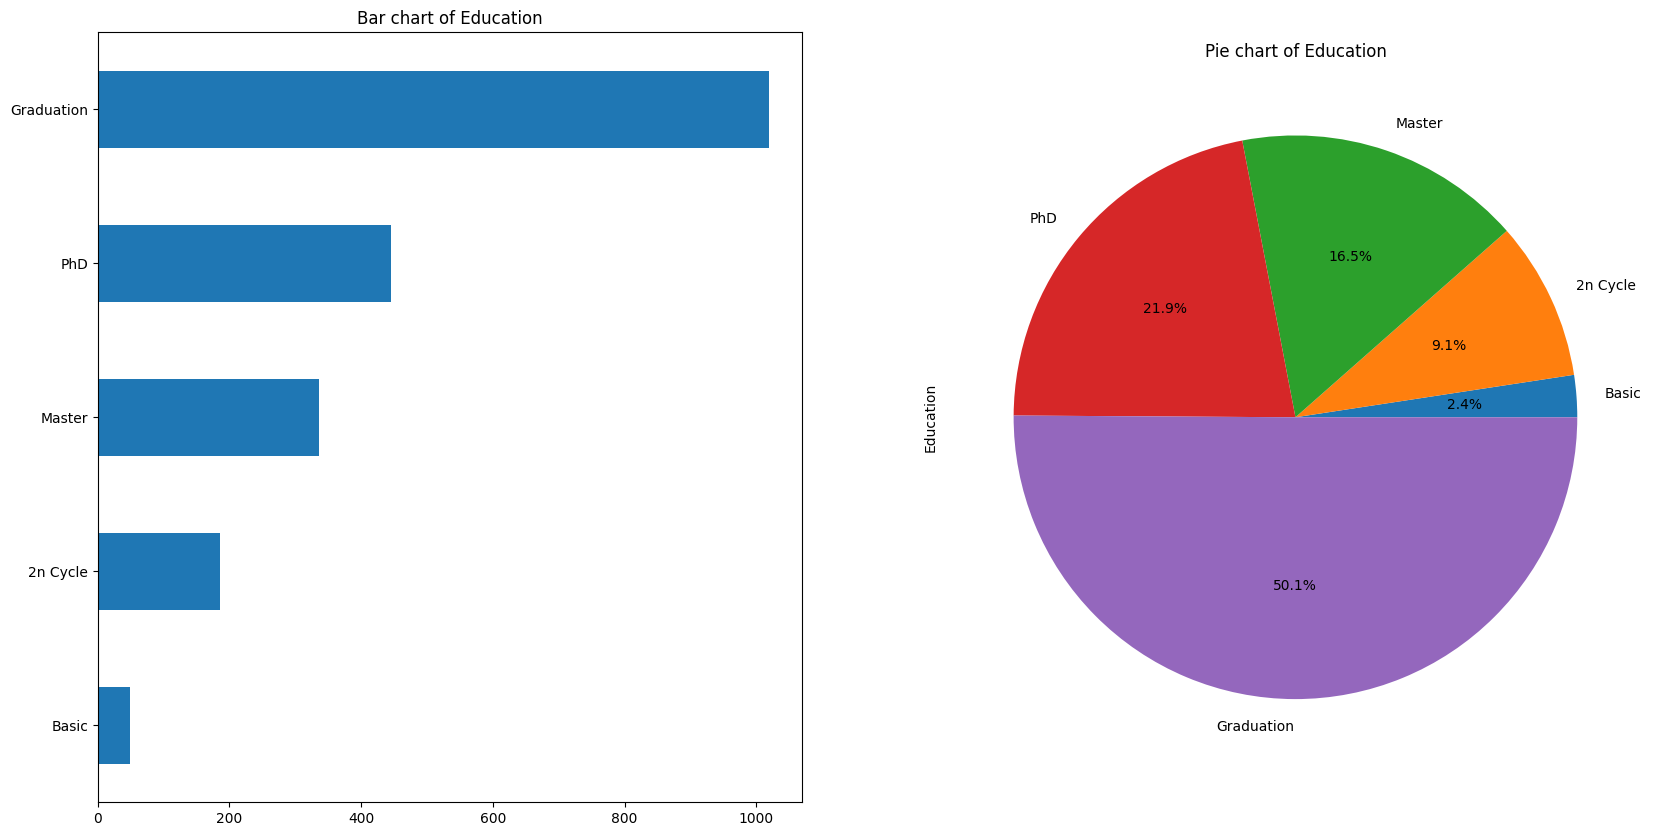

In [ ]:
diagnostic_plots_categ(df, 'Education')

Insight = most of the people in the dataset are college graduates, with second and third highest, surprisingly being PhD and Master's degree holders. Upon researching, 2n Cycle is just a different name for a Master's degree, so let's rename the 2n Cycle to Master's

In [ ]:
#replace the 2n Cycle with Master
df['Education'] = df['Education'].replace('2n Cycle','Master')

In [ ]:
# see if rename successful
df['Education'].value_counts()

Graduation    1019
Master         521
PhD            445
Basic           49
Name: Education, dtype: int64

Insight = successfully renamed 2n Cycle to Master

In [ ]:
#see cardinality of marital status
df['Marital_Status'].value_counts()

Married     788
Together    514
Single      439
Divorced    216
Widow        70
Alone         3
YOLO          2
Absurd        2
Name: Marital_Status, dtype: int64

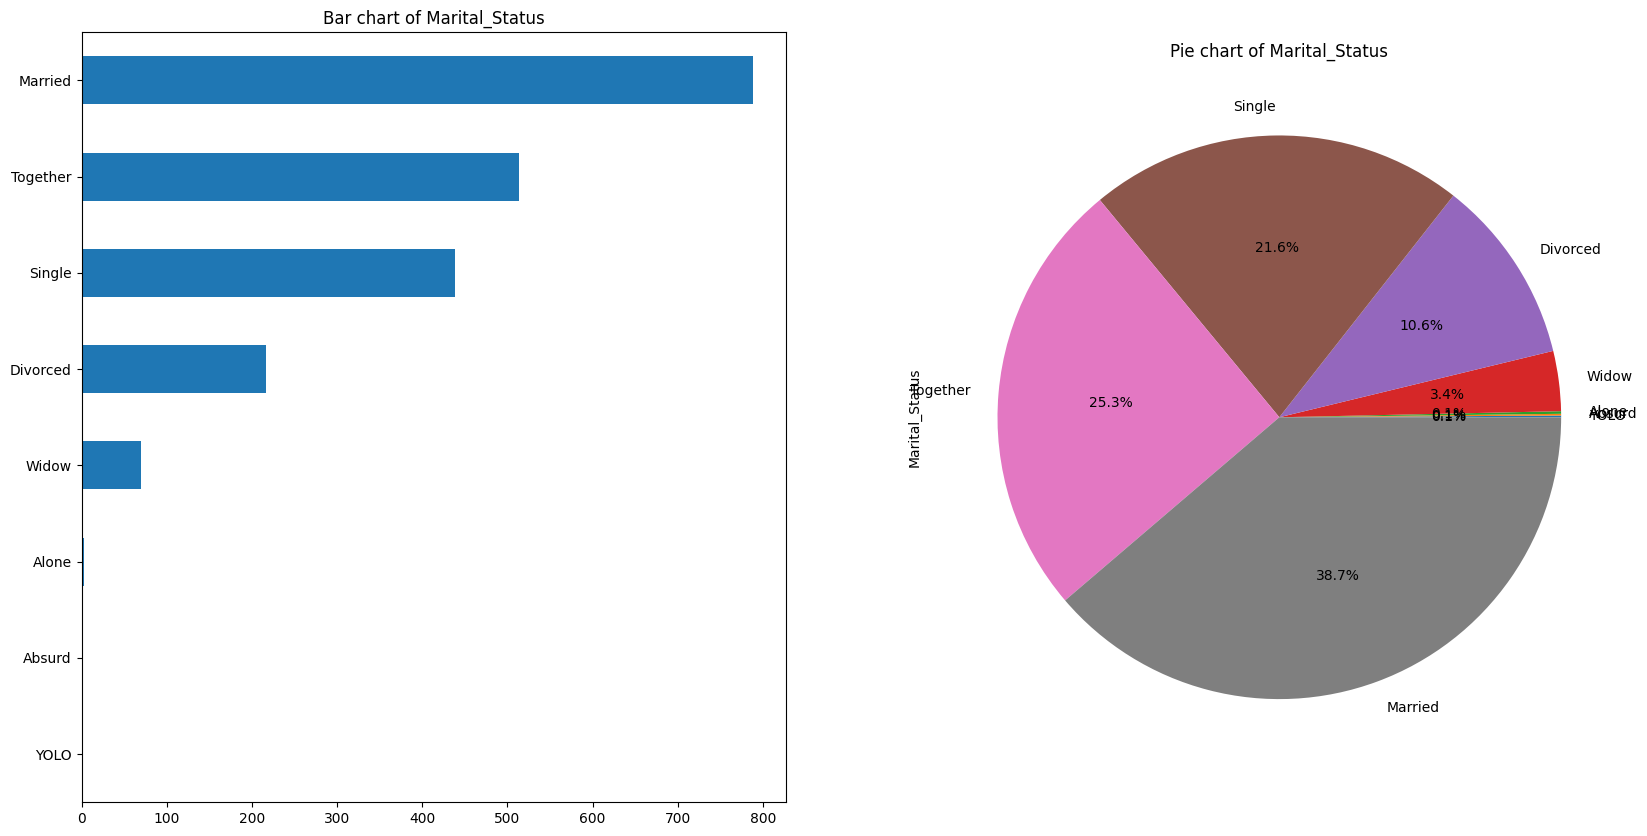

In [ ]:
diagnostic_plots_categ(df, 'Marital_Status')

Insight = cardinality is quite high with 8 names of different marital status. Due to how unclear 'YOLO' and 'Absurd' is, we're going to just group them to Single, along with 'Alone'.

Though 'Widow' is basically 'Divorced through death', I speculate that they may have different spending pattern compared to simply divorced people with all that inheritance. So, we're going to keep 'Widow' as is.

Married couple comprises the majority of this data with 'Together', perhaps, Engaged couple being the second highest. Makes sense with how families and to-be-families are more likely to spend time in a superstore and get themselves into a membership marketing campaign.

In [ ]:
# group Alone, YOLO< and Absurd into Single
df['Marital_Status'] = df['Marital_Status'].replace(['YOLO','Absurd','Alone'],'Single')

In [ ]:
# check if grouped
df['Marital_Status'].value_counts()

Married     788
Together    514
Single      446
Divorced    216
Widow        70
Name: Marital_Status, dtype: int64

Insight = the 'Alone','Absurd',and 'YOLO' has been grouped into 'Single'.

#### Dt_Customer and Year



In [ ]:
# see cardinality
df['Dt_Customer'].value_counts()

12/5/2014     10
3/23/2014      9
8/31/2012      9
12/9/2012      9
2/1/2013       9
              ..
6/13/2014      1
1/11/2013      1
10/19/2012     1
4/14/2013      1
1/9/2012       1
Name: Dt_Customer, Length: 662, dtype: int64

In [ ]:
# see cardinality
df['Year_Birth'].value_counts()

1976    81
1971    78
1975    77
1972    72
1970    71
1978    70
1973    66
1965    66
1969    64
1974    63
1956    52
1977    51
1958    50
1952    49
1968    47
1979    47
1959    46
1960    45
1966    44
1954    44
1955    43
1967    41
1962    40
1951    39
1963    39
1957    39
1980    39
1982    38
1986    38
1984    38
1964    37
1981    37
1983    35
1953    33
1961    32
1985    29
1949    28
1987    26
1950    26
1988    25
1989    24
1948    19
1990    16
1947    15
1991    14
1992    12
1946    11
1945     8
1944     7
1943     5
1993     4
1995     4
1994     3
1996     2
1893     1
1899     1
1941     1
1940     1
1900     1
Name: Year_Birth, dtype: int64

 Date of when customer starts shopping with the company has very high cardinality. We're going to change that into a numeric feature of 'how many months have the customers shopped with the company'.

 Regarding Year, that is also a categorical feature that is high in cardinality. Let's turn it into numerical feature of age as of 2024.

In [ ]:
# turning Dt_Customer into datetime

df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])

In [ ]:
# see if data successfully transformed into datetime
df['Dt_Customer'].head()

0   2014-06-16
1   2014-06-15
2   2014-05-13
3   2014-11-05
4   2014-08-04
Name: Dt_Customer, dtype: datetime64[ns]

In [ ]:
#make the loop to make a new feature column, Months_Customer
currdate = pd.to_datetime('1/1/2024')
Months_Customer = []

for n, i in enumerate(df['Dt_Customer']):
  r = relativedelta.relativedelta(currdate, df['Dt_Customer'].iloc[n])
  months = (12*r.years) + r.months
  Months_Customer.append(months)

In [ ]:
#append to dataframe then see:

df['Months_Customer'] = Months_Customer
df.head()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain,Months_Customer
0,1970,Graduation,Divorced,84835.0,0,0,2014-06-16,0,189,104,...,189,218,1,4,4,6,1,1,0,114
1,1961,Graduation,Single,57091.0,0,0,2014-06-15,0,464,5,...,0,37,1,7,3,7,5,1,0,114
2,1958,Graduation,Married,67267.0,0,1,2014-05-13,0,134,11,...,2,30,1,3,2,5,2,0,0,115
3,1967,Graduation,Together,32474.0,1,1,2014-11-05,0,10,0,...,0,0,1,1,0,2,7,0,0,109
4,1989,Graduation,Single,21474.0,1,0,2014-08-04,0,6,16,...,0,34,2,3,1,2,7,1,0,112


Insight = successfully created new feature of Months_Customer

In [ ]:
#make the loop to make a new feature column, age
Age = []

for i in df['Year_Birth']:
  age = 2024 - i
  Age.append(age)

In [ ]:
#append to dataframe then see:

df['Age'] = Age
df[['Year_Birth','Age']].head()

,Year_Birth,Age
0,1970,54
1,1961,63
2,1958,66
3,1967,57
4,1989,35


Insight = successfully created new numerical feature, Age

## Check Numerical Columns

In [ ]:
# make numerical plotter

def diagnostic_plots(df1, variable):
    # Print skew value
    print(f'Skewness value of {variable}: {df1[variable].skew()}')
    # Print Mean and Std dev
    print(f'Mean value of {variable} is {statistics.mean(df1[variable])}')
    # Print IQR Outlier
    q3, q1 = np.percentile(df1[variable], [75, 25])
    iqr = q3 - q1
    print(f'First Quartile is {q1}, Third Quartile is {q3}, IQR is {iqr}, and 3xIQR is {3*iqr}')
    print(f'Outliers will be removed are those below {q1-(3*iqr)} and higher than {q3+(3*iqr)}')

    plt.figure(figsize=(10, 4))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(df1[variable], bins=30)
    plt.title(f'Histogram of {variable}')

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(y=df1[variable])
    plt.title(f'Boxplot of {variable}')

    plt.show()

-----
### Correlation and Multicollinearity Analysis

In [ ]:
# want to separate out numerical data from categorical to see correlation and multicollinearity

df_num = df.drop(['Year_Birth','Dt_Customer','Education','Marital_Status','Dt_Customer'], axis='columns')
df_num.head() #see data

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain,Months_Customer,Age
0,84835.0,0,0,0,189,104,379,111,189,218,1,4,4,6,1,1,0,114,54
1,57091.0,0,0,0,464,5,64,7,0,37,1,7,3,7,5,1,0,114,63
2,67267.0,0,1,0,134,11,59,15,2,30,1,3,2,5,2,0,0,115,66
3,32474.0,1,1,0,10,0,1,0,0,0,1,1,0,2,7,0,0,109,57
4,21474.0,1,0,0,6,16,24,11,0,34,2,3,1,2,7,1,0,112,35


Insight = successfully made numerical only dataframe

<function matplotlib.pyplot.show(close=None, block=None)>

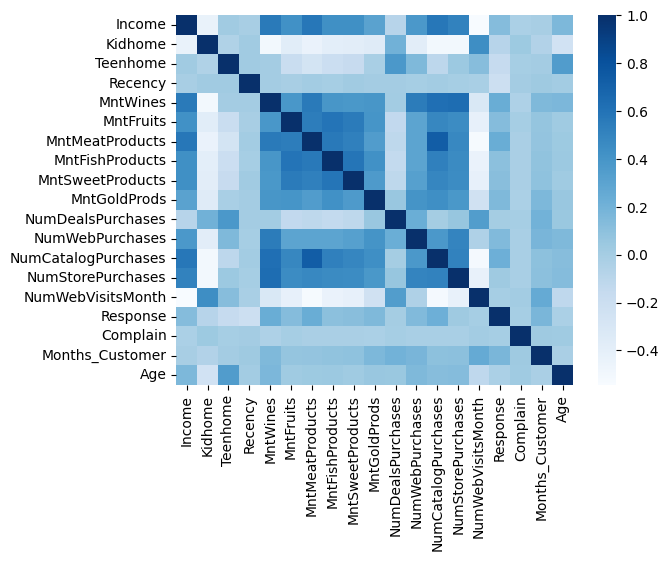

In [ ]:
#seeing correlation

sns.heatmap(df_num.corr(), cmap='Blues')
plt.show

Insight = none of the features and target are very strongly correlated (correlation value >0.8), though some are highly correlated, such as NumCatalogPurchases and amount of meat product bought, income and catalog purchases, income and wine purchases (this one makes the most obvious sense), number of store purchases and wine purchases, etc.

Let's check the multicollinearity next

In [ ]:
vif_Data = pd.DataFrame()
vif_Data['feature'] = df_num.columns

vif_Data['VIF'] = [variance_inflation_factor(df_num.values, i) for i in range(len(df_num.columns))]

vif_Data

,feature,VIF
0,Income,10.684021
1,Kidhome,3.071907
2,Teenhome,2.968228
3,Recency,4.077777
4,MntWines,4.799876
5,MntFruits,2.764328
6,MntMeatProducts,4.618440
7,MntFishProducts,3.061550
8,MntSweetProducts,2.685704
9,MntGoldProds,2.560301


Insight = from this multicollinearity test, we can see that there is multicollinearity in some features (those with VIF value >10). Let's try dropping some then see the multicollinearity again.

First one we're going to try dropping is NumWebVisitsPerMonth as it should be also represented in the amount of Web Purchases--the more often, ideally the purchase value should also increase.

In [ ]:
#drop number of web visits per month then seeing the VIF values again

df_num = df_num.drop(['NumWebVisitsMonth'], axis='columns')

vif_Data = pd.DataFrame()

vif_Data['feature'] = df_num.columns

vif_Data['VIF'] = [variance_inflation_factor(df_num.values, i) for i in range(len(df_num.columns))]

vif_Data

,feature,VIF
0,Income,9.816270
1,Kidhome,3.029800
2,Teenhome,2.963478
3,Recency,4.075892
4,MntWines,4.689105
5,MntFruits,2.762400
6,MntMeatProducts,4.528921
7,MntFishProducts,3.053423
8,MntSweetProducts,2.673366
9,MntGoldProds,2.557460


Insight = dropping number of web visit per month has decreased the VIF of some features, namely Income, Months_Customer, and Age, though Months_Customer and Age are still too high (>10)

Let's assume that age is a bigger factor in membership purchase decision compared to how long they've been a customer. You can be a long-time loyal customer and not get a membership, especially noting how high the entrance fee is. Older people may have the money to buy such membership.

In [ ]:
#drop Months_Customer per month then seeing the VIF values again

df_num = df_num.drop(['Months_Customer'], axis='columns')

vif_Data = pd.DataFrame()

vif_Data['feature'] = df_num.columns

vif_Data['VIF'] = [variance_inflation_factor(df_num.values, i) for i in range(len(df_num.columns))]

vif_Data

,feature,VIF
0,Income,9.499518
1,Kidhome,2.551546
2,Teenhome,2.906705
3,Recency,3.763408
4,MntWines,4.627835
5,MntFruits,2.762360
6,MntMeatProducts,4.528609
7,MntFishProducts,3.053389
8,MntSweetProducts,2.673319
9,MntGoldProds,2.543072


Insight = dropping Months_Customer dropped VIF values some more. Age's VIF value of 25 dropped to 11.

As mentioned, we wanted to keep Age as the older the person is the more likely they are to be **financially established** and hence the more likely they are to purchase a membership.

Financial wellness is reflected in Income. And older people having more income than younger people makes perfect sense and it explains why the VIF in Age and Income is so high.

We'll drop Age and check the VIF again.

In [ ]:
#drop Months_Customer per month then seeing the VIF values again

df_num = df_num.drop(['Age'], axis='columns')

vif_Data = pd.DataFrame()

vif_Data['feature'] = df_num.columns

vif_Data['VIF'] = [variance_inflation_factor(df_num.values, i) for i in range(len(df_num.columns))]

vif_Data

,feature,VIF
0,Income,8.322516
1,Kidhome,2.303814
2,Teenhome,2.603242
3,Recency,3.283264
4,MntWines,4.571416
5,MntFruits,2.762154
6,MntMeatProducts,4.523822
7,MntFishProducts,3.050575
8,MntSweetProducts,2.664079
9,MntGoldProds,2.542643


Insight = all VIF now no longer above 10, multicollinearity problem is fixed, it should be more clear for the model which features affect the target.

#### Conclusion of Correlation and Multicollinearity Analysis

We'll be dropping NumWebVisitsMonth, Months_Customer, and Age for our model.

-----

### Descriptive Statistics

Sussing out outliers and what to do with them

Skewness value of Kidhome: 0.6214730533150322
Mean value of Kidhome is 0.44296951819075714
First Quartile is 0.0, Third Quartile is 1.0, IQR is 1.0, and 3xIQR is 3.0
Outliers will be removed are those below -3.0 and higher than 4.0


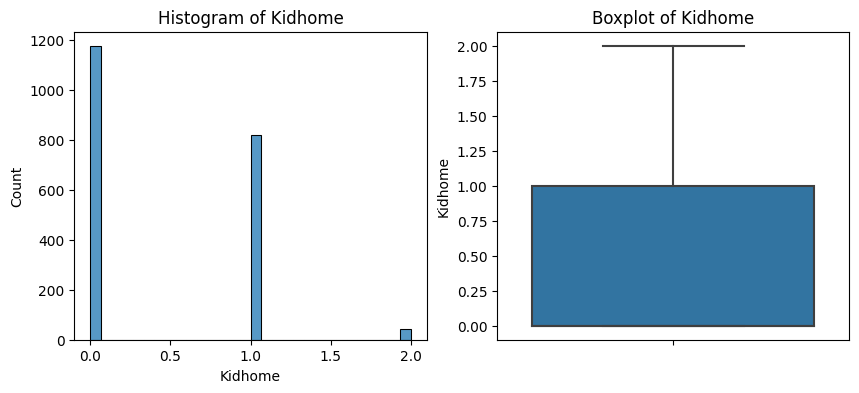

Skewness value of Teenhome: 0.4112305916828174
Mean value of Teenhome is 0.5083579154375615
First Quartile is 0.0, Third Quartile is 1.0, IQR is 1.0, and 3xIQR is 3.0
Outliers will be removed are those below -3.0 and higher than 4.0


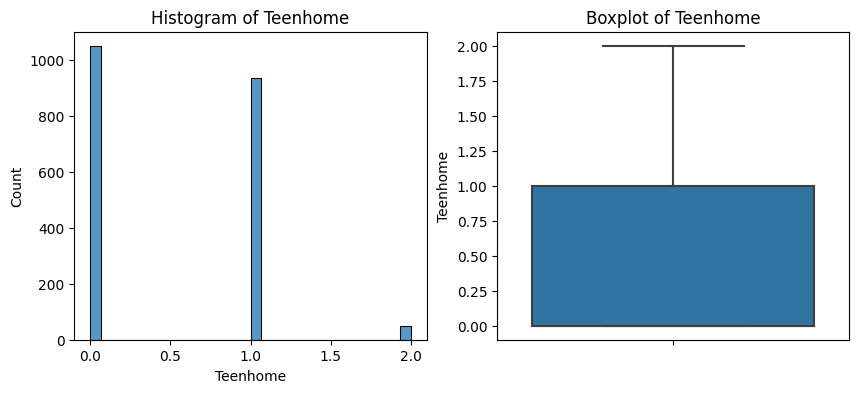

In [ ]:
diagnostic_plots(df, 'Kidhome')
diagnostic_plots(df, 'Teenhome')

Insight = most customers have no children, though those that do have not more than 2 children and 2 teens at the same time. Data is relatively normal for Teenhome feature though Kidhome has a bit of a skewness. No outliers are detected using boxplot.

Skewness value of Income: 7.058216394277115
Mean value of Income is 52357.791543756146
First Quartile is 35528.25, Third Quartile is 68480.75, IQR is 32952.5, and 3xIQR is 98857.5
Outliers will be removed are those below -63329.25 and higher than 167338.25


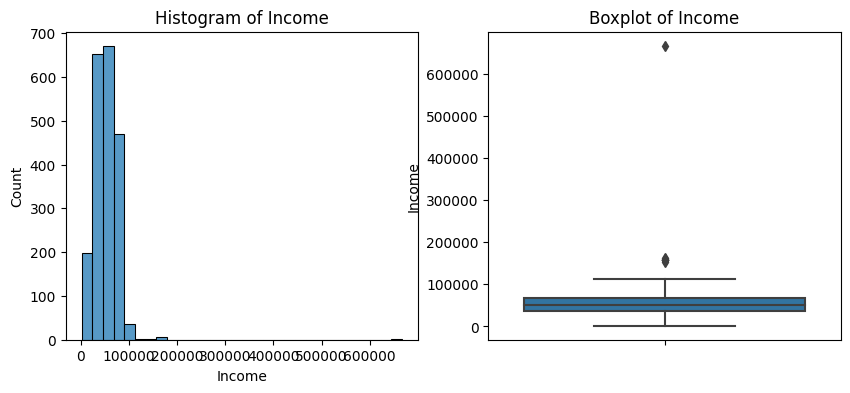

In [ ]:
diagnostic_plots(df, 'Income')

Insight = on average, customers make 52,357 USD a year, though some are outliers who makes 200,000-ish and 600,000-ish USD a year.

Those with high income are a dilemma for us. They may be more liable to splurge on a membership deal, as the entrance fee won't be much for them, but also, if they have that much buying power, will they need/want the discounts the membership offers?

We're keeping those outliers not capped and not removed for the reasons stated above. The models that will be tried: KNN, SVM, Decision Tree, and Random Forest are all robust to outliers.

Skewness value of MntFishProducts: 1.9269851030971665
Mean value of MntFishProducts is 37.44936086529007
First Quartile is 3.0, Third Quartile is 50.0, IQR is 47.0, and 3xIQR is 141.0
Outliers will be removed are those below -138.0 and higher than 191.0


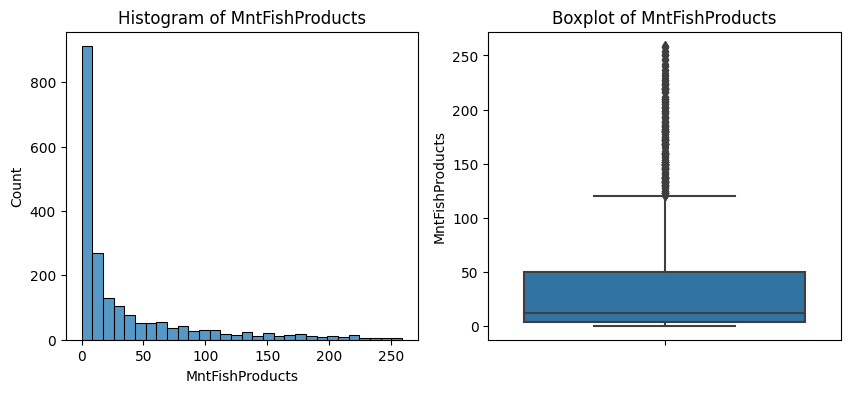

Skewness value of MntMeatProducts: 2.045105470375298
Mean value of MntMeatProducts is 167.76352015732547
First Quartile is 16.0, Third Quartile is 230.0, IQR is 214.0, and 3xIQR is 642.0
Outliers will be removed are those below -626.0 and higher than 872.0


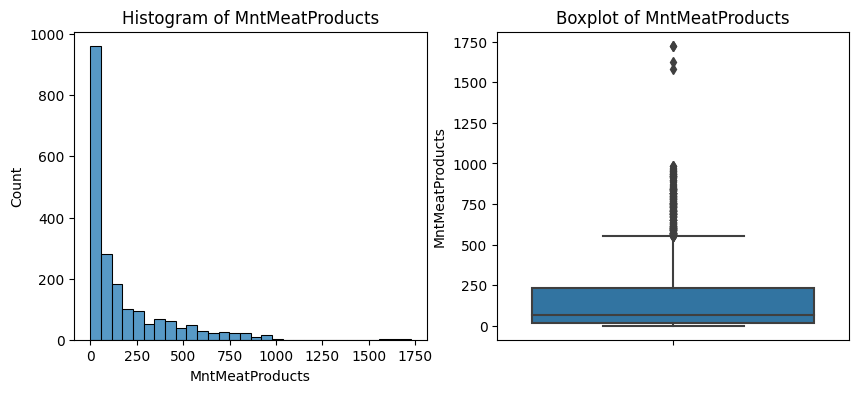

Skewness value of MntFruits: 2.1077276259768793
Mean value of MntFruits is 26.292527040314653
First Quartile is 2.0, Third Quartile is 33.0, IQR is 31.0, and 3xIQR is 93.0
Outliers will be removed are those below -91.0 and higher than 126.0


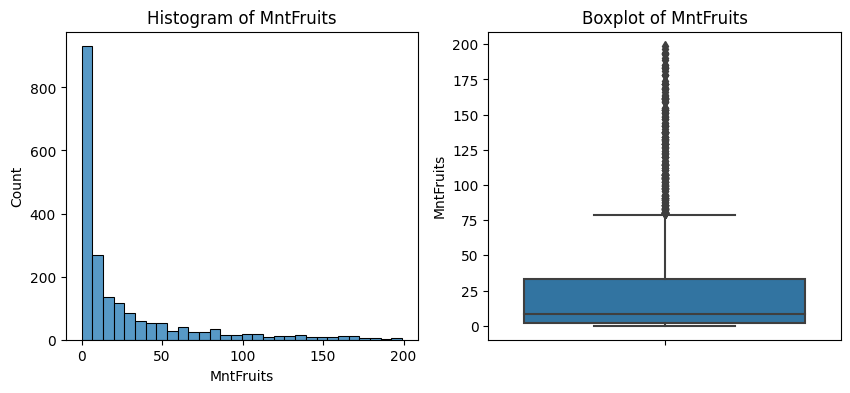

Skewness value of MntSweetProducts: 2.1163963220094693
Mean value of MntSweetProducts is 27.14110127826942
First Quartile is 1.0, Third Quartile is 33.75, IQR is 32.75, and 3xIQR is 98.25
Outliers will be removed are those below -97.25 and higher than 132.0


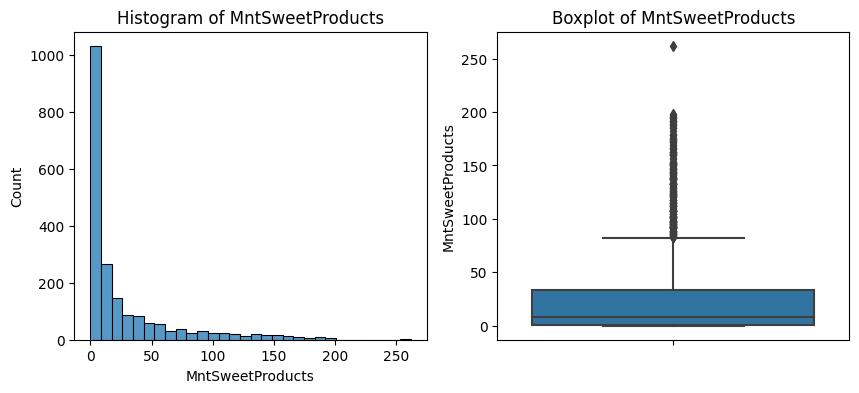

Skewness value of MntWines: 1.1689158810285651
Mean value of MntWines is 305.18092428711896
First Quartile is 23.0, Third Quartile is 505.0, IQR is 482.0, and 3xIQR is 1446.0
Outliers will be removed are those below -1423.0 and higher than 1951.0


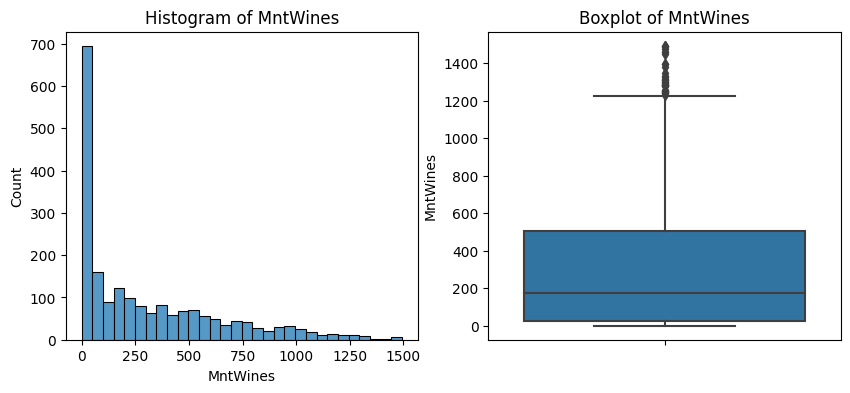

Skewness value of MntGoldProds: 1.8542529203913625
Mean value of MntGoldProds is 43.809734513274336
First Quartile is 9.0, Third Quartile is 56.0, IQR is 47.0, and 3xIQR is 141.0
Outliers will be removed are those below -132.0 and higher than 197.0


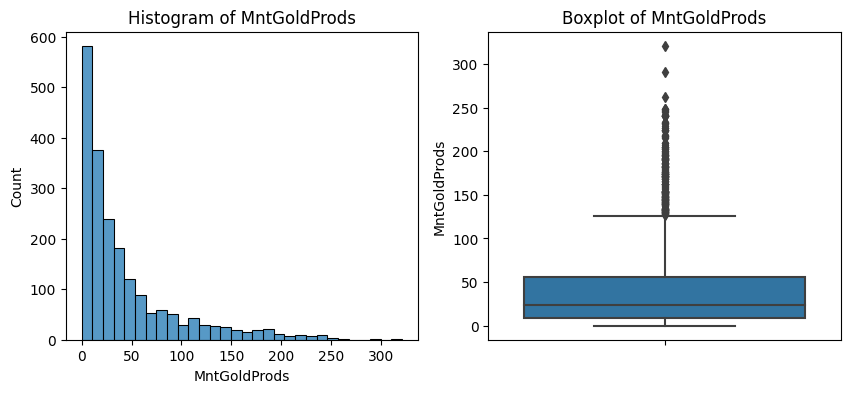

In [ ]:
diagnostic_plots(df, 'MntFishProducts')
diagnostic_plots(df, 'MntMeatProducts')
diagnostic_plots(df, 'MntFruits')
diagnostic_plots(df, 'MntSweetProducts')
diagnostic_plots(df, 'MntWines')
diagnostic_plots(df, 'MntGoldProds')

Insight = most purchases of all product categories recorded shows that most datapoint recorded zero purchases, which may mean that the customers just happen to not buy products of that categories, example: buying only vegetables, grains, drinks, seasoning, seafood, etc., or, the data collection is a survey and customers just don't remember that kind of things.

Anyhow, if we cap the outliers, we'll lose out on those who purchases a lot, the people who will benefit the most from having a membership and are probably the ones with enough money to splurge on a membership, so, these features won't be outlier handled.

Skewness value of NumDealsPurchases: 2.436782873170714
Mean value of NumDealsPurchases is 2.337758112094395
First Quartile is 1.0, Third Quartile is 3.0, IQR is 2.0, and 3xIQR is 6.0
Outliers will be removed are those below -5.0 and higher than 9.0


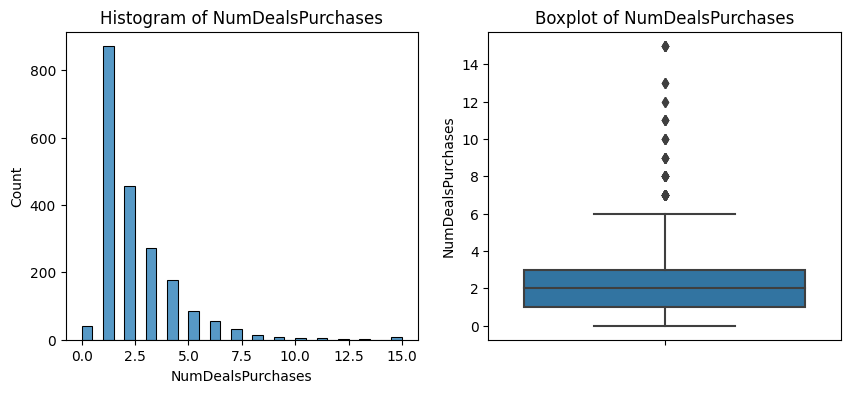

Skewness value of NumCatalogPurchases: 1.9514581034472456
Mean value of NumCatalogPurchases is 2.6705998033431664
First Quartile is 0.0, Third Quartile is 4.0, IQR is 4.0, and 3xIQR is 12.0
Outliers will be removed are those below -12.0 and higher than 16.0


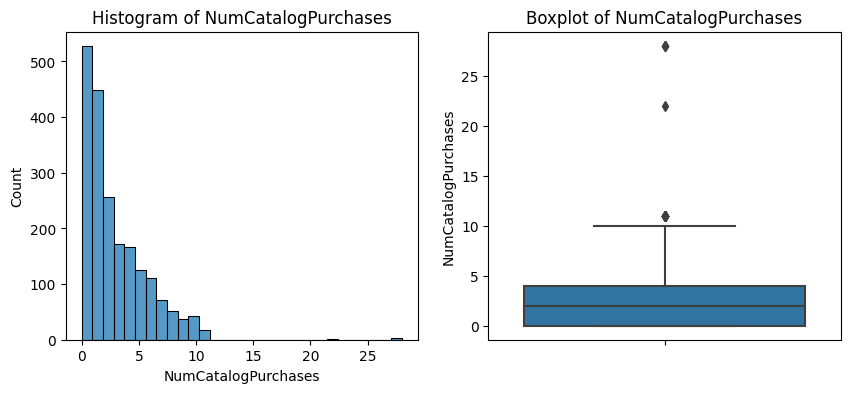

Skewness value of NumStorePurchases: 0.701082831908251
Mean value of NumStorePurchases is 5.78220255653884
First Quartile is 3.0, Third Quartile is 8.0, IQR is 5.0, and 3xIQR is 15.0
Outliers will be removed are those below -12.0 and higher than 23.0


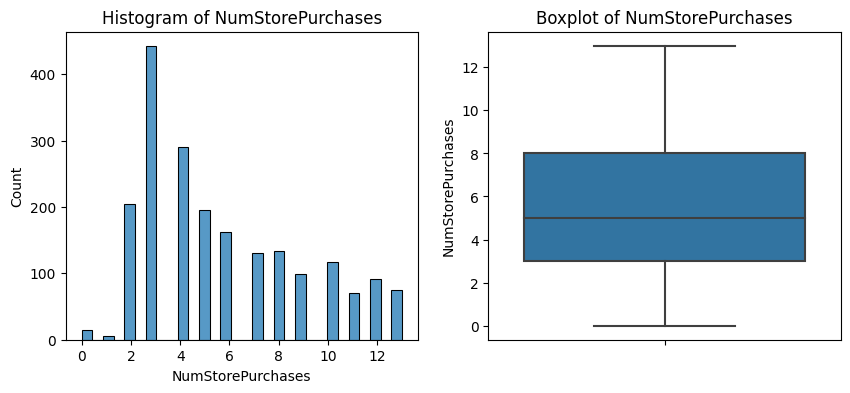

Skewness value of NumWebPurchases: 1.2308062913129743
Mean value of NumWebPurchases is 4.0993117010816125
First Quartile is 2.0, Third Quartile is 6.0, IQR is 4.0, and 3xIQR is 12.0
Outliers will be removed are those below -10.0 and higher than 18.0


In [ ]:
diagnostic_plots(df, 'NumDealsPurchases')
diagnostic_plots(df, 'NumCatalogPurchases')
diagnostic_plots(df, 'NumStorePurchases')
diagnostic_plots(df, 'NumWebPurchases')

Insight = we can see from the data that people buy from catalog the least often, while the highest purchase method is in-store. Only in store purchases amount have no high-value outliers of while others do. Same with the amount of product bought, these high value outliers or purchases may reflect people with more buying power who should be more likely to buy a membership, and are also people who would benefit the most from the membership, so they won't be outlier handled.

In [ ]:
diagnostic_plots(df, 'Recency')

Insight = lowest skewness so far, no outlier to be handled. People are on average back to buying from the superstore after 48 days though it's worth mentioning the highest frequency in the histogram is near zero, meaning a lot of people actually come back to the store almost everyday.

#### Conclusion of Descriptive Statistics

- No outlier handling to preserve high-value data

# Feature Engineering

##TrainTest-Inference Split

In [267]:
# define X-y

X = df.drop(['Response','Year_Birth','Dt_Customer',
             'NumWebVisitsMonth', 'Age', 'Months_Customer'], axis='columns')

y=df['Response']

In [268]:
#split traintest-inference
X_traintest, X_inference, y_traintest, y_inference = train_test_split(X,y,
                                                    test_size=0.15,
                                                    random_state=1010)

print('Train-Test size : ', X_traintest.shape)
print('inference size  : ', X_inference.shape)

Train-Test size :  (1728, 17)
inference size  :  (306, 17)


In [269]:
# save inference to csv as wanting to do inference in separate notebook

X_inference.to_csv('X_inference', encoding='utf-8', index=False)
y_inference.to_csv('y_inference', encoding='utf-8', index=False)

## Train-Test Split

In [270]:
#split train-test

X_train, X_test, y_train, y_test = train_test_split(X_traintest,y_traintest,
                                                    test_size=0.25,
                                                    random_state=1010)

print('Train size : ', X_train.shape)
print('Test size  : ', X_test.shape)

Train size :  (1296, 17)
Test size  :  (432, 17)


## (No outlier handling as previously mentioned)

## Feature Encoding

In [271]:
#getting categorical dataframe

X_train_cat = X_train[['Education','Marital_Status']]
X_test_cat = X_test[['Education','Marital_Status']]

In [272]:
# Feature Encoding - using ordinal encoder to avoid high cardinality
# also, there's a clear assumption of hierarchy on which group is more likely to buy the membership

encoder = OrdinalEncoder(categories=[
    ['Basic','Graduation', 'Master', 'PhD'],
    ['Single', 'Divorced', 'Together', 'Widow', 'Married']]).set_output(transform = 'pandas')
encoder.fit(X_train_cat)

X_train_encoded = encoder.transform(X_train_cat)
X_test_encoded = encoder.transform(X_test_cat)

In [273]:
#see encoded data

X_train_encoded.head()

,Education,Marital_Status
874,3.0,4.0
1802,2.0,4.0
1196,1.0,4.0
304,2.0,2.0
588,2.0,4.0


## Feature Scaling

In [274]:
#getting num dataframe
X_train_num = X_train.drop(['Education','Marital_Status','Complain'],axis='columns')
X_test_num = X_test.drop(['Education','Marital_Status','Complain'],axis='columns')

In [275]:
# concat the categorical and numerical preprocessed data

X_train_to_scale = pd.concat([X_train_encoded, X_train_num, X_train['Complain']], axis='columns')
X_test_to_scale = pd.concat([X_test_encoded, X_test_num, X_test['Complain']], axis='columns')

(Note = Yes, Complain is an encoded categorical data that does not need scaling, but I know it will not change if scaled, so it's put there before scaling just to decrease the times I have to concate)

In [276]:
# Feature Scaling using MinMaxScaler because most data are skewed

scaler = MinMaxScaler().set_output(transform = 'pandas')
scaler.fit(X_train_to_scale)

X_train_final = scaler.transform(X_train_to_scale)
X_test_final = scaler.transform(X_test_to_scale)

In [277]:
#see scaled and final train data

X_train_final.head()

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,Complain
874,1.000000,1.0,0.046492,0.5,0.0,0.383838,0.160080,0.015075,0.081739,0.000000,0.026718,0.071651,0.266667,0.259259,0.035714,0.461538,0.0
1802,0.666667,1.0,0.065160,0.5,0.0,0.808081,0.024782,0.000000,0.004058,0.011583,0.000000,0.009346,0.066667,0.074074,0.000000,0.230769,0.0
1196,0.333333,1.0,0.040172,1.0,0.0,0.535354,0.012726,0.015075,0.005797,0.042471,0.030534,0.018692,0.200000,0.074074,0.035714,0.307692,0.0
304,0.666667,0.5,0.061570,0.0,0.0,0.121212,0.103148,0.010050,0.026667,0.077220,0.015267,0.046729,0.066667,0.148148,0.071429,0.307692,0.0
588,0.666667,1.0,0.136003,0.0,0.0,0.252525,0.547220,0.919598,0.462029,0.409266,0.622137,0.062305,0.000000,0.185185,0.392857,0.384615,0.0


In [278]:
#see final test data
X_test_final.head()

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,Complain
1786,0.666667,1.00,0.044149,0.5,0.5,0.797980,0.010717,0.010050,0.006377,0.011583,0.000000,0.049844,0.133333,0.037037,0.035714,0.153846,0.0
1181,1.000000,0.50,0.067602,0.0,1.0,0.525253,0.180174,0.075377,0.040000,0.057915,0.072519,0.118380,0.133333,0.148148,0.214286,0.307692,0.0
129,0.333333,0.25,0.105786,0.0,0.5,0.040404,0.355660,0.346734,0.173913,0.579151,0.526718,0.467290,0.200000,0.185185,0.142857,0.615385,0.0
2223,0.333333,0.50,0.115328,0.0,0.5,1.000000,0.303416,0.190955,0.161739,0.725869,0.145038,0.570093,0.133333,0.259259,0.250000,0.769231,0.0
1462,0.333333,0.75,0.038061,0.0,0.0,0.646465,0.000670,0.130653,0.014493,0.065637,0.087786,0.046729,0.066667,0.111111,0.000000,0.230769,0.0


## Data Balancing

Upon first run of model evaluation, it was seen that recall for the desired class of response is still low at 20%-30%. We'll do data balancing to better the odds of the machine at classifying potential membership buyers.

In [279]:
# Oversampling with SMOTE

smote = SMOTE(sampling_strategy='minority', k_neighbors=5, random_state=42) # Minority Class will have same the same number as the majority class
smote.fit(X_train_final, y_train)

X_train_balanced, y_train_balanced = smote.fit_resample(X_train_final, y_train)
X_test_balanced, y_test_balanced = smote.fit_resample(X_test_final, y_test)

In [280]:
X_train_balanced.head()

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,Complain
0,1.000000,1.0,0.046492,0.5,0.0,0.383838,0.160080,0.015075,0.081739,0.000000,0.026718,0.071651,0.266667,0.259259,0.035714,0.461538,0.0
1,0.666667,1.0,0.065160,0.5,0.0,0.808081,0.024782,0.000000,0.004058,0.011583,0.000000,0.009346,0.066667,0.074074,0.000000,0.230769,0.0
2,0.333333,1.0,0.040172,1.0,0.0,0.535354,0.012726,0.015075,0.005797,0.042471,0.030534,0.018692,0.200000,0.074074,0.035714,0.307692,0.0
3,0.666667,0.5,0.061570,0.0,0.0,0.121212,0.103148,0.010050,0.026667,0.077220,0.015267,0.046729,0.066667,0.148148,0.071429,0.307692,0.0
4,0.666667,1.0,0.136003,0.0,0.0,0.252525,0.547220,0.919598,0.462029,0.409266,0.622137,0.062305,0.000000,0.185185,0.392857,0.384615,0.0


In [281]:
y_train_balanced.head()

0    0
1    0
2    0
3    0
4    1
Name: Response, dtype: int64

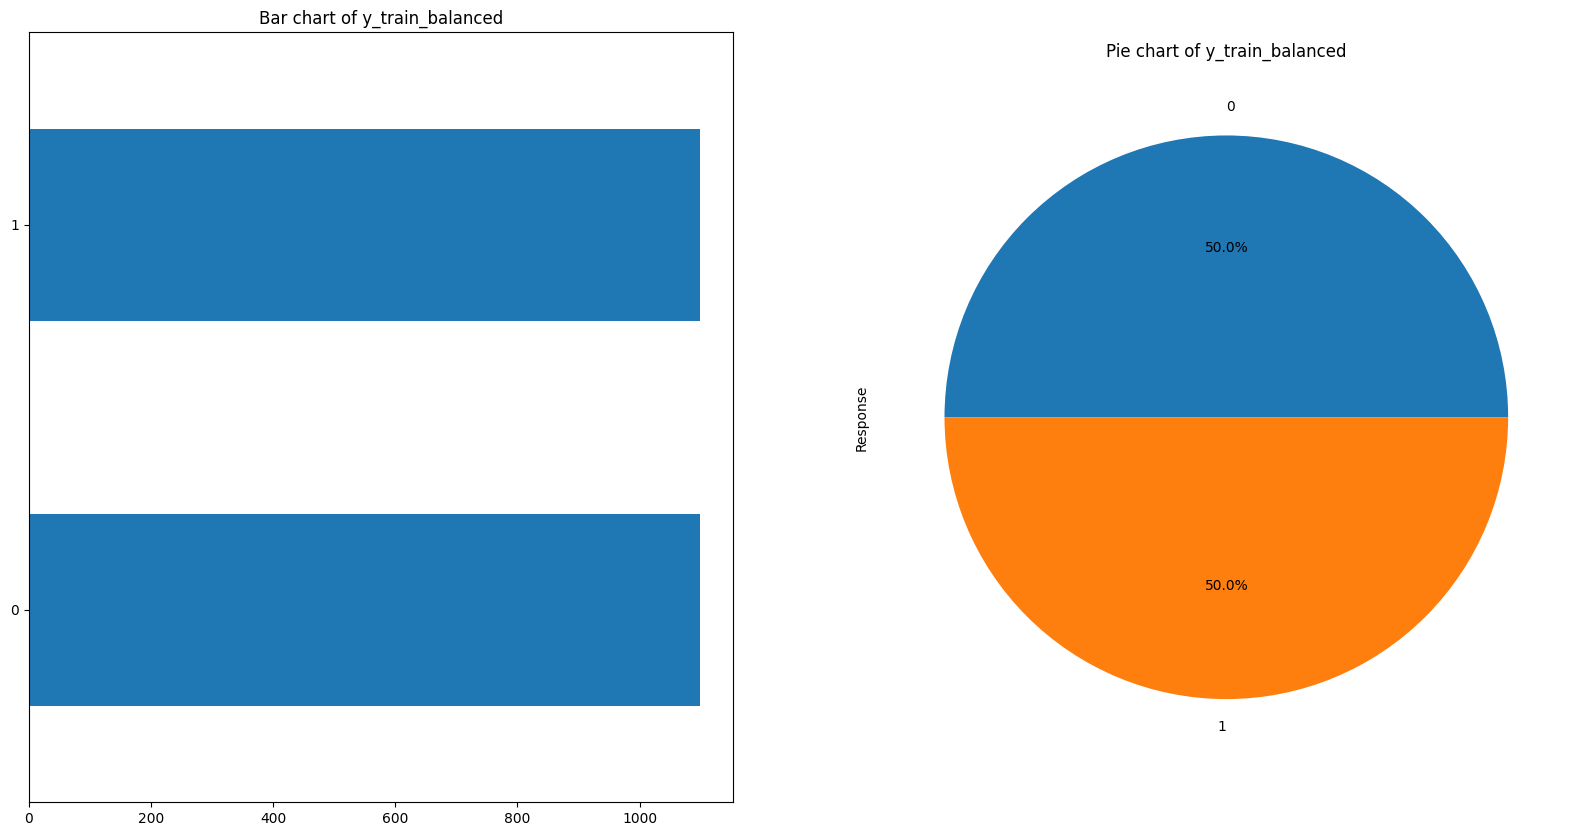

In [282]:
# check balance

# Define figure size
plt.figure(figsize=(20, 10))

# Barh
plt.subplot(1, 2, 1)
y_train_balanced.value_counts().sort_values(ascending=True).plot(kind='barh')
plt.title(f'Bar chart of y_train_balanced')

# Pie plot
plt.subplot(1, 2, 2)
y_train_balanced.value_counts().sort_values(ascending=True).plot(kind = 'pie', autopct="%.1f%%")
plt.title(f'Pie chart of y_train_balanced')

plt.show()

Insight = Now data is balanced with 50% of Not Buy Membership (0) and 50% Buy Membership (1)

# Model Definition

We're doing classification, so we'll try out several models that are often used in classification and then we'll see which performed better on getting the highest recall and F1-score.

The models tried will be Known Nearest Neighbor (KNN), SVM (Support Vector Machine), Decision Tree, and Random Forest.

## Known Nearest Neighbor (KNN)

In [283]:
# model KNN in their default parameters set by scikit learn
knn = KNeighborsClassifier()
knn_balanced = KNeighborsClassifier()

## Support-Vector Machine (SVM)

In [284]:
# model SVM Classifier in their default parameters set by scikit learn
svm = SVC()
svm_balanced = SVC()

## Decision Tree

In [285]:
#define model decision tree in their default parameters

model_dt = DecisionTreeClassifier(random_state=12024)
model_dt_balanced = DecisionTreeClassifier(random_state=12024)

## Random Forest

In [286]:
# define random forest in their default parameters

rnd_clf = RandomForestClassifier(random_state=42)
rnd_clf_balanced = RandomForestClassifier(random_state=42)

# Model Training

with default parameters

## KNN

In [287]:
# train KNN

knn.fit(X_train_final, y_train)
knn_balanced.fit(X_train_balanced, y_train_balanced)

KNeighborsClassifier()

## SVM

In [288]:
# train SVM

svm.fit(X_train_final, y_train)
svm_balanced.fit(X_train_balanced, y_train_balanced)

SVC()

## Decision Tree

In [289]:
# Training Decision Tree Model
%%time

model_dt.fit(X_train_final, y_train)
model_dt_balanced.fit(X_train_balanced, y_train_balanced)

CPU times: user 46.3 ms, sys: 0 ns, total: 46.3 ms
Wall time: 47.2 ms


DecisionTreeClassifier(random_state=12024)

## Random Forest

In [290]:
# Model Training - Random Forest - Using Decision Tree as Base Model
%%time

rnd_clf.fit(X_train_final, y_train)
rnd_clf_balanced.fit(X_train_balanced, y_train_balanced)

CPU times: user 922 ms, sys: 3.6 ms, total: 925 ms
Wall time: 937 ms


RandomForestClassifier(random_state=42)

# Model Evaluation

## Without Balancing

In [291]:
# Model Evaluation
classes=['Not Buy [Negative]','Buy [Positive]']
def performance_check(clf, X, y, classes):
  y_pred = clf.predict(X)
  cm = confusion_matrix(y, y_pred)
  disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)
  disp.plot()
  plt.show()
  print(classification_report(y, y_pred, target_names=classes))

### KNN

KNN Train


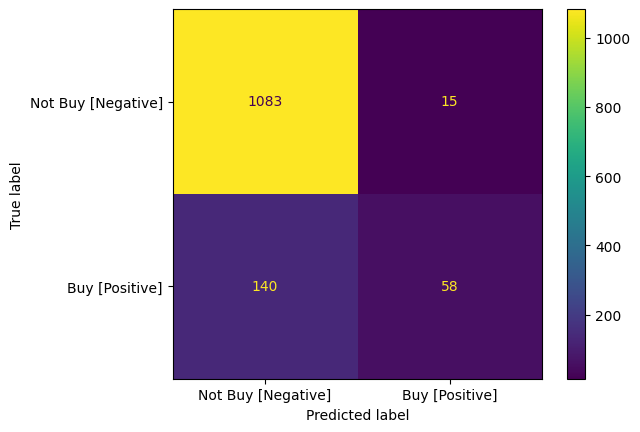

                    precision    recall  f1-score   support

Not Buy [Negative]       0.89      0.99      0.93      1098
    Buy [Positive]       0.79      0.29      0.43       198

          accuracy                           0.88      1296
         macro avg       0.84      0.64      0.68      1296
      weighted avg       0.87      0.88      0.86      1296

KNN Test


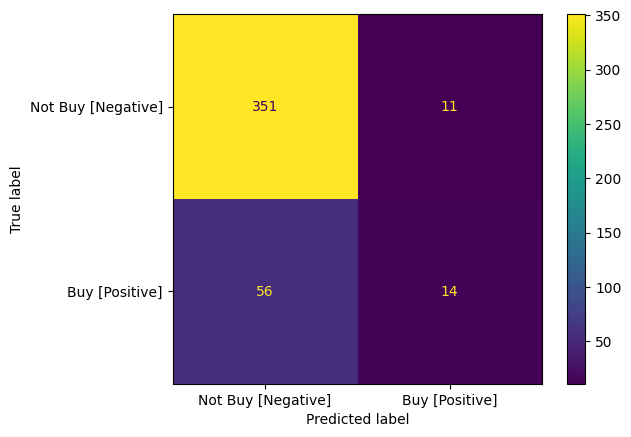

                    precision    recall  f1-score   support

Not Buy [Negative]       0.86      0.97      0.91       362
    Buy [Positive]       0.56      0.20      0.29        70

          accuracy                           0.84       432
         macro avg       0.71      0.58      0.60       432
      weighted avg       0.81      0.84      0.81       432



In [292]:
print('KNN Train')
performance_check(knn,X_train_final, y_train, classes)
print('KNN Test')
performance_check(knn,X_test_final, y_test, classes)

Insight = KNN model with default parameters returned:
  - recall for positives to be low, at 29%-20% (train-test).
  - F1 score for the positive class are also low, at 43%-29% (train-test).
  
This means that only around 30% of the Buy response are identified correctly by the model.

### SVM

SVM Train


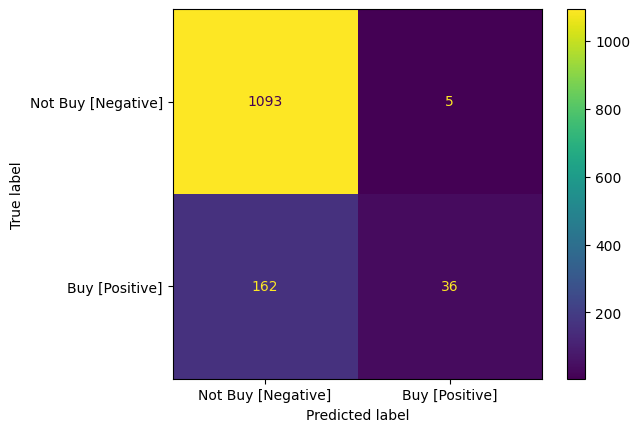

                    precision    recall  f1-score   support

Not Buy [Negative]       0.87      1.00      0.93      1098
    Buy [Positive]       0.88      0.18      0.30       198

          accuracy                           0.87      1296
         macro avg       0.87      0.59      0.62      1296
      weighted avg       0.87      0.87      0.83      1296

SVM Test


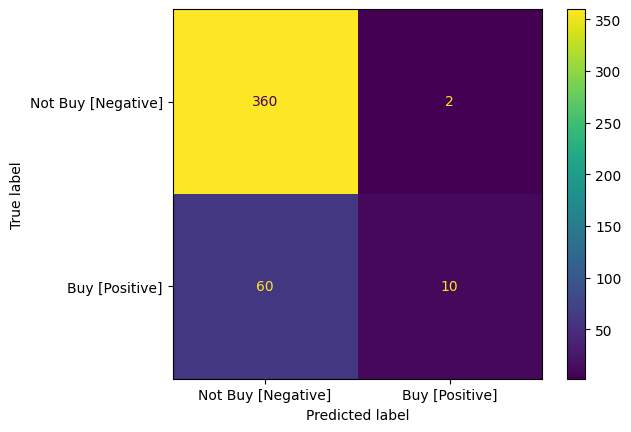

                    precision    recall  f1-score   support

Not Buy [Negative]       0.86      0.99      0.92       362
    Buy [Positive]       0.83      0.14      0.24        70

          accuracy                           0.86       432
         macro avg       0.85      0.57      0.58       432
      weighted avg       0.85      0.86      0.81       432



In [293]:
print('SVM Train')
performance_check(svm,X_train_final, y_train, classes)
print('SVM Test')
performance_check(svm,X_test_final, y_test, classes)

Insight = SVM model with default parameter returned:
  - around 15% recall and around 25% F1-score for the postives.
  
This means only around 20% of the buy response are identified correctly.

### Decision Tree

Decision Tree - Train


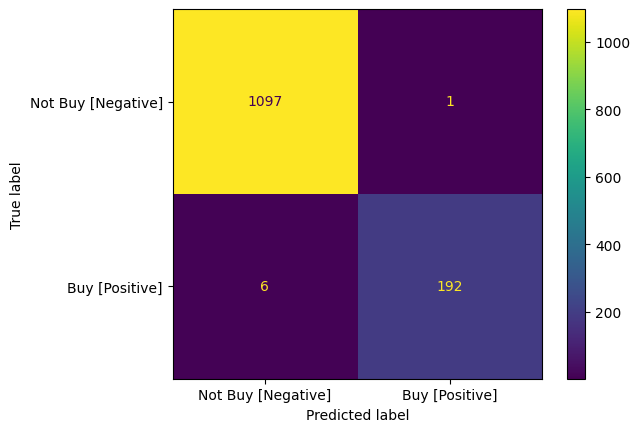

                    precision    recall  f1-score   support

Not Buy [Negative]       0.99      1.00      1.00      1098
    Buy [Positive]       0.99      0.97      0.98       198

          accuracy                           0.99      1296
         macro avg       0.99      0.98      0.99      1296
      weighted avg       0.99      0.99      0.99      1296

Decision Tree - Test


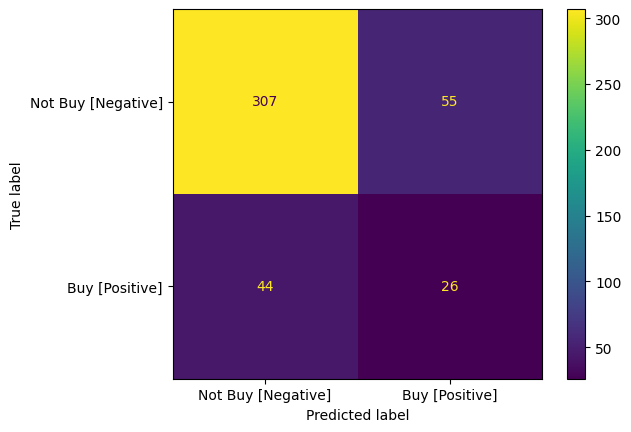

                    precision    recall  f1-score   support

Not Buy [Negative]       0.87      0.85      0.86       362
    Buy [Positive]       0.32      0.37      0.34        70

          accuracy                           0.77       432
         macro avg       0.60      0.61      0.60       432
      weighted avg       0.78      0.77      0.78       432



In [294]:
print('Decision Tree - Train')
performance_check(model_dt,X_train_final, y_train, classes)
print('Decision Tree - Test')
performance_check(model_dt,X_test_final, y_test, classes)

Insight = Decision tree model seems to be overfitted on the training side, as it returns:
  - 99% recall and 98% f1-score on positives
  
   while upon using test set it returns:
  - 37% recall with 34% F1-score on test set's positives. Which means, on test set, only around 37% of the buy response are classified correctly.

### Random Forest

Random Forest - Train


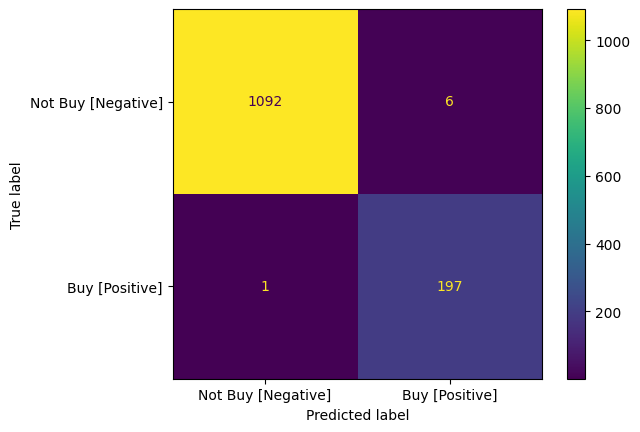

                    precision    recall  f1-score   support

Not Buy [Negative]       1.00      0.99      1.00      1098
    Buy [Positive]       0.97      0.99      0.98       198

          accuracy                           0.99      1296
         macro avg       0.98      0.99      0.99      1296
      weighted avg       0.99      0.99      0.99      1296

Random Forst - Test


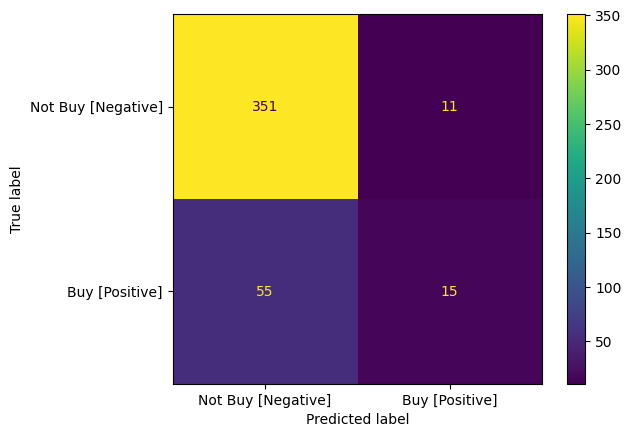

                    precision    recall  f1-score   support

Not Buy [Negative]       0.86      0.97      0.91       362
    Buy [Positive]       0.58      0.21      0.31        70

          accuracy                           0.85       432
         macro avg       0.72      0.59      0.61       432
      weighted avg       0.82      0.85      0.82       432



In [295]:
print('Random Forest - Train')
performance_check(rnd_clf,X_train_final, y_train, classes)
print('Random Forst - Test')
performance_check(rnd_clf,X_test_final, y_test, classes)

Insight = Random Forest seems to also face the same scenario with Decision tree model: overfitted on the training side. It returns:
  - 99% recall and f1-score on train set's positives

  while upon using test set it returns:
  - 21% recall with 31% F1-score on test set's positives. Which means, on test set, only around 21% of the buy response are classified correctly.

### Conclusion on Model Evaluation without balancing:

Results of models: recall on positives of test set
  - KNN: 29%
  - SVM: 14%
  - Decision Tree: 37%
  - Random Forest: 21%

With imbalance data, the models were not able to 'learn' the characteristics of the minority class sufficiently, hence when ran again with the test dataset, they are all rather poor at classifying postives correctly.

## With Balancing

### KNN

KNN Train


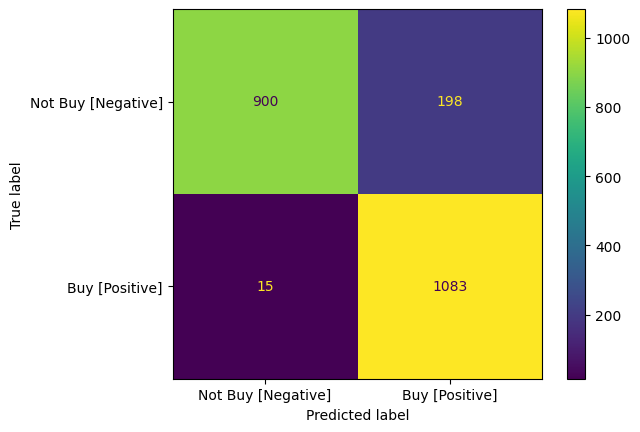

                    precision    recall  f1-score   support

Not Buy [Negative]       0.98      0.82      0.89      1098
    Buy [Positive]       0.85      0.99      0.91      1098

          accuracy                           0.90      2196
         macro avg       0.91      0.90      0.90      2196
      weighted avg       0.91      0.90      0.90      2196

KNN Test


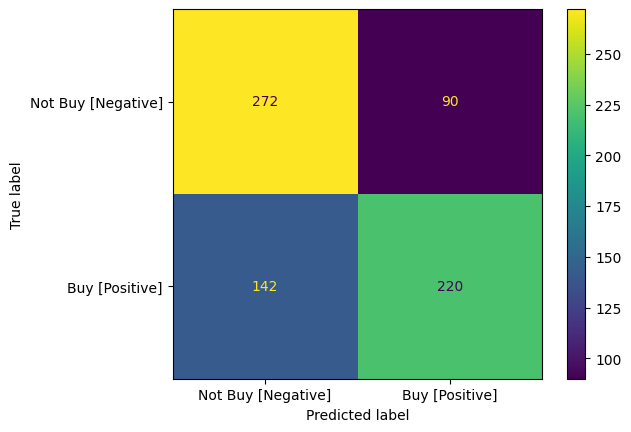

                    precision    recall  f1-score   support

Not Buy [Negative]       0.66      0.75      0.70       362
    Buy [Positive]       0.71      0.61      0.65       362

          accuracy                           0.68       724
         macro avg       0.68      0.68      0.68       724
      weighted avg       0.68      0.68      0.68       724



In [296]:
print('KNN Train')
performance_check(knn_balanced,X_train_balanced, y_train_balanced, classes)
print('KNN Test')
performance_check(knn_balanced,X_test_balanced, y_test_balanced, classes)

Insight = with balanced data, KNN returns 61% recall and 65% f1-score on test set positives. Which means, around 61% of the buy response are classified correctly.

### SVM

SVM Train


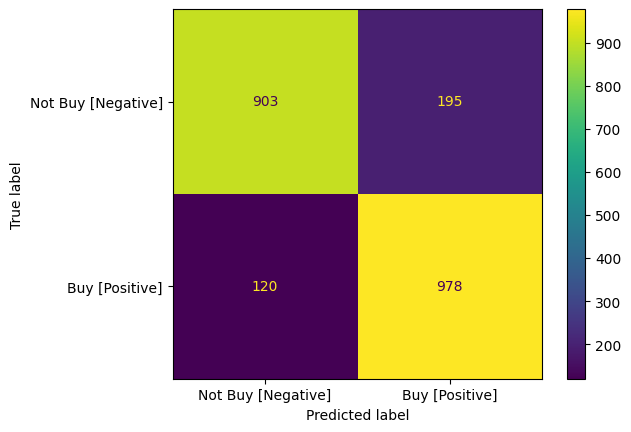

                    precision    recall  f1-score   support

Not Buy [Negative]       0.88      0.82      0.85      1098
    Buy [Positive]       0.83      0.89      0.86      1098

          accuracy                           0.86      2196
         macro avg       0.86      0.86      0.86      2196
      weighted avg       0.86      0.86      0.86      2196

SVM Test


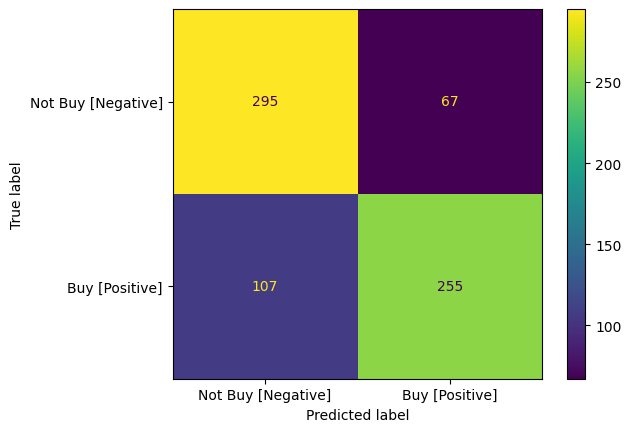

                    precision    recall  f1-score   support

Not Buy [Negative]       0.73      0.81      0.77       362
    Buy [Positive]       0.79      0.70      0.75       362

          accuracy                           0.76       724
         macro avg       0.76      0.76      0.76       724
      weighted avg       0.76      0.76      0.76       724



In [297]:
print('SVM Train')
performance_check(svm_balanced,X_train_balanced, y_train_balanced, classes)
print('SVM Test')
performance_check(svm_balanced,X_test_balanced, y_test_balanced, classes)

Insight = with balanced data, SVM returns 70% recall and 75% f1-score on test set positives. Which means, around 70% of the buy response are classified correctly.

### Decision Tree

Decision Tree Train


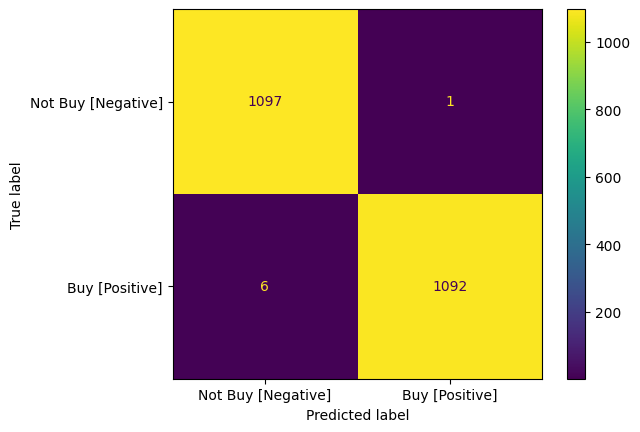

                    precision    recall  f1-score   support

Not Buy [Negative]       0.99      1.00      1.00      1098
    Buy [Positive]       1.00      0.99      1.00      1098

          accuracy                           1.00      2196
         macro avg       1.00      1.00      1.00      2196
      weighted avg       1.00      1.00      1.00      2196

Decision Tree Test


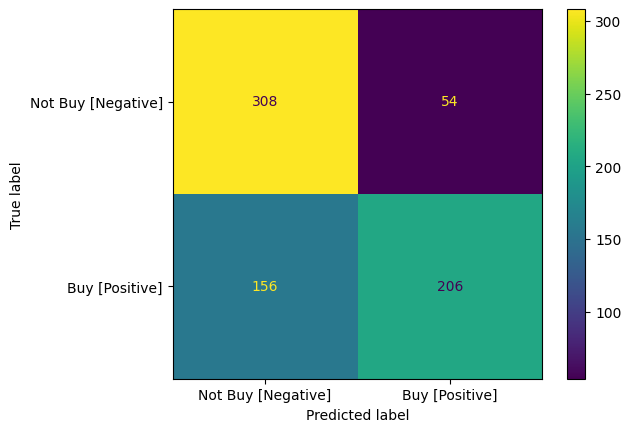

                    precision    recall  f1-score   support

Not Buy [Negative]       0.66      0.85      0.75       362
    Buy [Positive]       0.79      0.57      0.66       362

          accuracy                           0.71       724
         macro avg       0.73      0.71      0.70       724
      weighted avg       0.73      0.71      0.70       724



In [298]:
print('Decision Tree Train')
performance_check(model_dt_balanced,X_train_balanced, y_train_balanced, classes)
print('Decision Tree Test')
performance_check(model_dt_balanced,X_test_balanced, y_test_balanced, classes)

Insight = with balanced data, Decision Tree returns 57% recall and 66% f1-score on test set positives. Which means, around 57% of the buy response are classified correctly.

### Random Forest

Random Forest Train


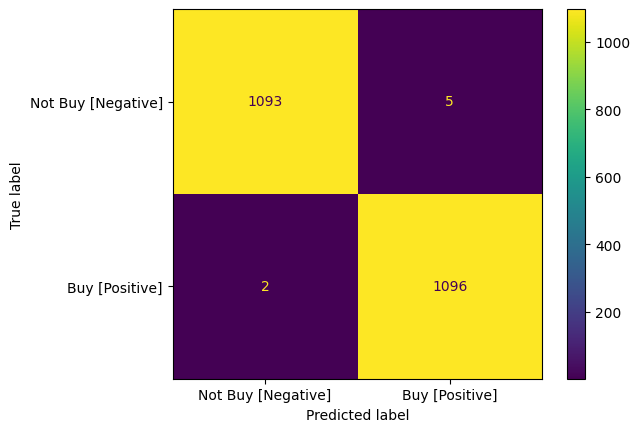

                    precision    recall  f1-score   support

Not Buy [Negative]       1.00      1.00      1.00      1098
    Buy [Positive]       1.00      1.00      1.00      1098

          accuracy                           1.00      2196
         macro avg       1.00      1.00      1.00      2196
      weighted avg       1.00      1.00      1.00      2196

Random Forest Test


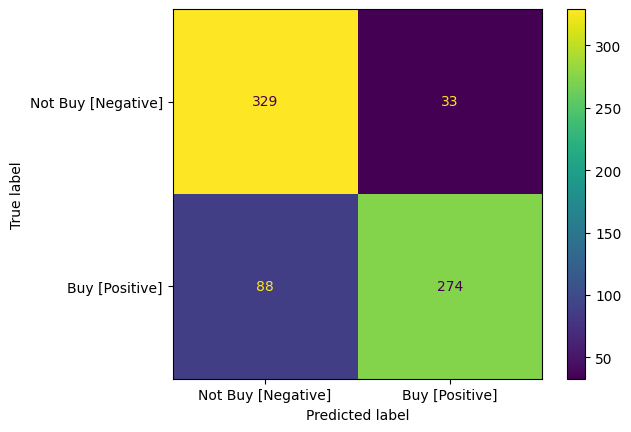

                    precision    recall  f1-score   support

Not Buy [Negative]       0.79      0.91      0.84       362
    Buy [Positive]       0.89      0.76      0.82       362

          accuracy                           0.83       724
         macro avg       0.84      0.83      0.83       724
      weighted avg       0.84      0.83      0.83       724



In [299]:
print('Random Forest Train')
performance_check(rnd_clf_balanced,X_train_balanced, y_train_balanced, classes)
print('Random Forest Test')
performance_check(rnd_clf_balanced,X_test_balanced, y_test_balanced, classes)

Insight = with balanced data, Random Forest returns 76% recall and 82% f1-score on test set positives. Which means, around 76% of the buy response are classified correctly.

### Conclusion on Model Evaluation with balancing:



Results of models: recall on positives of test set
  - KNN: 61%
  - SVM: 70%
  - Decision Tree: 57%
  - Random Forest: 76%

  With balanced data, the model were better at correctly identifying buy responses compared to when using imbalanced data.

## Conclusion on Model Evaluation

Upon model evaluation, the model chosen will be **Random Forest** that was trained on balanced data as it returned the highest recall and f1-score on the test sets.

# Model Training and Evaluation 2: Random Forest, Now With Hyperparameter Tuning

## Random Search

In [300]:
# Hyperparameter Tuning : Random Search

# Define Hyperparameters
n_estimators = [int(x) for x in np.linspace(start=100, stop=1000, num = 10)]
max_depth = [int(x) for x in np.linspace(10, 800, 10)]
min_samples_split = [2, 3, 5, 10, 14]
min_samples_leaf = [ 2, 3, 5, 8, 12]
max_leaf_nodes = [2, 5, 8, 10, 14, 17]
random_search_params = {'n_estimators': n_estimators,
                        'max_depth':max_depth,
                        'min_samples_split':min_samples_split,
                        'min_samples_leaf':min_samples_leaf,
                        'max_leaf_nodes':max_leaf_nodes}
random_search_params

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000],
 'max_depth': [10, 97, 185, 273, 361, 448, 536, 624, 712, 800],
 'min_samples_split': [2, 3, 5, 10, 14],
 'min_samples_leaf': [2, 3, 5, 8, 12],
 'max_leaf_nodes': [2, 5, 8, 10, 14, 17]}

In [301]:
# Train with Random Search
%%time

rf_randomcv = RandomizedSearchCV(estimator=RandomForestClassifier(),
                                 param_distributions=random_search_params,
                                 n_iter=50,
                                 cv=5,
                                 random_state=46,
                                 n_jobs=-1,
                                 scoring='recall')

rf_randomcv.fit(X_train_balanced, y_train_balanced)

CPU times: user 4.44 s, sys: 680 ms, total: 5.12 s
Wall time: 5min 23s


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=50,
                   n_jobs=-1,
                   param_distributions={'max_depth': [10, 97, 185, 273, 361,
                                                      448, 536, 624, 712, 800],
                                        'max_leaf_nodes': [2, 5, 8, 10, 14, 17],
                                        'min_samples_leaf': [2, 3, 5, 8, 12],
                                        'min_samples_split': [2, 3, 5, 10, 14],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000]},
                   random_state=46, scoring='recall')

In [302]:
# Get Best Hyperparameters

rf_randomcv.best_params_

{'n_estimators': 200,
 'min_samples_split': 5,
 'min_samples_leaf': 5,
 'max_leaf_nodes': 17,
 'max_depth': 800}

In [303]:
# Get Best Estimator

rf_randomcv_best = rf_randomcv.best_estimator_

F1 Score - Test Set   :  0.8466757123473542 

Classification Report : 
               precision    recall  f1-score   support

           0       0.86      0.83      0.84       362
           1       0.83      0.86      0.85       362

    accuracy                           0.84       724
   macro avg       0.84      0.84      0.84       724
weighted avg       0.84      0.84      0.84       724
 

Confusion Matrix      : 


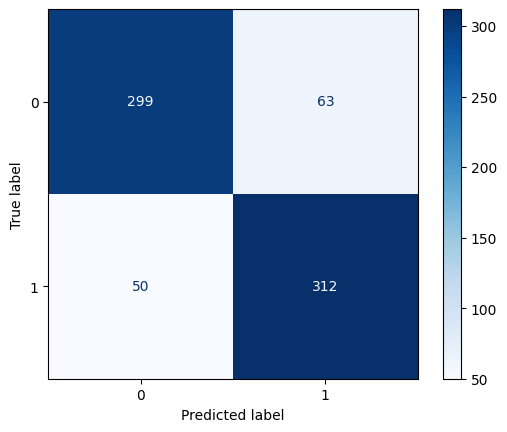

In [304]:
# Check Performance Model against Test-Set

y_pred_test = rf_randomcv_best.predict(X_test_balanced)

print('F1 Score - Test Set   : ', f1_score(y_test_balanced, y_pred_test), '\n')
print('Classification Report : \n', classification_report(y_test_balanced, y_pred_test), '\n')
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(rf_randomcv_best, X_test_balanced, y_test_balanced, cmap='Blues'))

Insight = after doing Random Search Grid Validation and using the best parameters, which are:
  - n estimators = 200
  - min samples split = 5
  - min samples leaf = 5
  - max leaf nodes = 17
  - max depth = 800

the Random Forest model are able to return:
  - Score of recall of positives at 86% with 85% f1-score of positives

## Grid Search CV

In [305]:
grid_search_params = {
    'n_estimators': [rf_randomcv.best_params_['n_estimators'] - 50,
                     rf_randomcv.best_params_['n_estimators'],
                     rf_randomcv.best_params_['n_estimators'] + 50],
    'max_depth': [rf_randomcv.best_params_['max_depth'] - 50,
                  rf_randomcv.best_params_['max_depth'],
                  rf_randomcv.best_params_['max_depth'] + 50],
    'min_samples_split': [rf_randomcv.best_params_['min_samples_split']],
    'min_samples_leaf': [rf_randomcv.best_params_['min_samples_leaf'],
                         rf_randomcv.best_params_['min_samples_leaf'] + 2,
                         rf_randomcv.best_params_['min_samples_leaf'] + 4],
    'max_leaf_nodes': [rf_randomcv.best_params_['max_leaf_nodes'] - 3,
                       rf_randomcv.best_params_['max_leaf_nodes'],
                       rf_randomcv.best_params_['max_leaf_nodes'] + 3],
}

grid_search_params

{'n_estimators': [150, 200, 250],
 'max_depth': [750, 800, 850],
 'min_samples_split': [5],
 'min_samples_leaf': [5, 7, 9],
 'max_leaf_nodes': [14, 17, 20]}

In [306]:
# Train with Grid Search
%%time

rf_gridcv = GridSearchCV(estimator=RandomForestClassifier(),
                         param_grid=grid_search_params,
                         cv=5,
                         n_jobs=-1,
                         verbose=2,
                         scoring='recall')

rf_gridcv.fit(X_train_balanced, y_train_balanced)

Fitting 5 folds for each of 81 candidates, totalling 405 fits
CPU times: user 4.11 s, sys: 577 ms, total: 4.69 s
Wall time: 4min 14s


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [750, 800, 850],
                         'max_leaf_nodes': [14, 17, 20],
                         'min_samples_leaf': [5, 7, 9],
                         'min_samples_split': [5],
                         'n_estimators': [150, 200, 250]},
             scoring='recall', verbose=2)

In [307]:
# Get Best Hyperparameters

rf_gridcv.best_params_

{'max_depth': 750,
 'max_leaf_nodes': 20,
 'min_samples_leaf': 9,
 'min_samples_split': 5,
 'n_estimators': 200}

In [308]:
# Get Best Estimator

rf_gridcv_best = rf_gridcv.best_estimator_

F1 Score - Test Set   :  0.8435374149659863 

Classification Report : 
               precision    recall  f1-score   support

           0       0.85      0.83      0.84       362
           1       0.83      0.86      0.84       362

    accuracy                           0.84       724
   macro avg       0.84      0.84      0.84       724
weighted avg       0.84      0.84      0.84       724
 

Confusion Matrix      : 


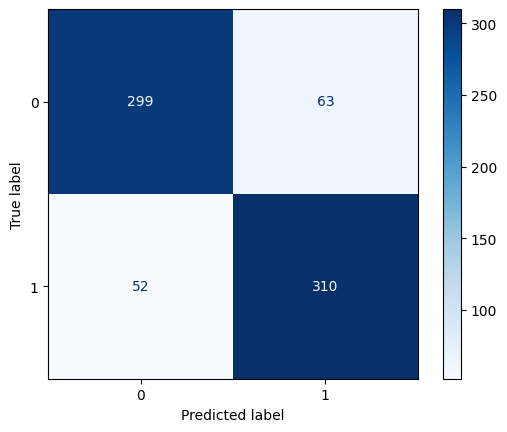

In [309]:
# Check Performance Model against Test-Set

y_pred_test = rf_gridcv_best.predict(X_test_balanced)

print('F1 Score - Test Set   : ', f1_score(y_test_balanced, y_pred_test), '\n')
print('Classification Report : \n', classification_report(y_test_balanced, y_pred_test), '\n')
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(rf_gridcv_best, X_test_balanced, y_test_balanced, cmap='Blues'))

Insight = after doing Grid Search Cross Validation and using the best parameters, which are:
  - n estimators = 200
  - min samples split = 5
  - min samples leaf = 9
  - max leaf nodes = 20
  - max depth = 750

the Random Forest model are able to return:
  - Score of recall of positives at 86% with 84% f1-score of positives

# Boosting

this is more appropriately Bagging-Boosting because the chosen model is Random Forest (Bagging of Decision Tree)

In [310]:
# define and train boosting
%%time

ada_clf = AdaBoostClassifier(
    RandomForestClassifier(n_estimators = 300, min_samples_split = 2,
                           min_samples_leaf = 3, max_leaf_nodes = 20,
                           max_depth = 448, random_state=42),
    n_estimators=100,
    random_state=42)

ada_clf.fit(X_train_balanced, y_train_balanced)

CPU times: user 2min 24s, sys: 371 ms, total: 2min 25s
Wall time: 2min 26s


AdaBoostClassifier(estimator=RandomForestClassifier(max_depth=448,
                                                    max_leaf_nodes=20,
                                                    min_samples_leaf=3,
                                                    n_estimators=300,
                                                    random_state=42),
                   n_estimators=100, random_state=42)

AdaBoost Train


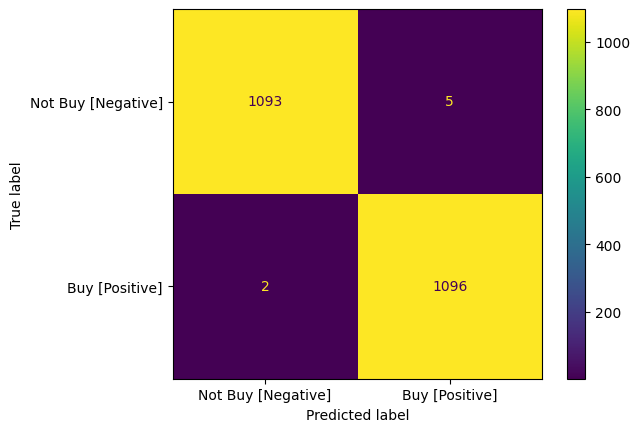

                    precision    recall  f1-score   support

Not Buy [Negative]       1.00      1.00      1.00      1098
    Buy [Positive]       1.00      1.00      1.00      1098

          accuracy                           1.00      2196
         macro avg       1.00      1.00      1.00      2196
      weighted avg       1.00      1.00      1.00      2196

AdaBoost Test


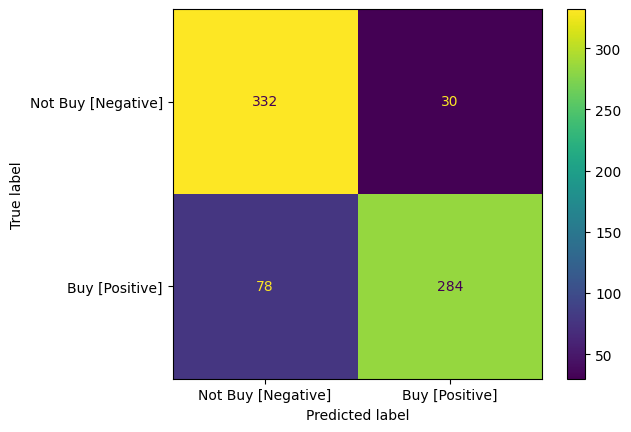

                    precision    recall  f1-score   support

Not Buy [Negative]       0.81      0.92      0.86       362
    Buy [Positive]       0.90      0.78      0.84       362

          accuracy                           0.85       724
         macro avg       0.86      0.85      0.85       724
      weighted avg       0.86      0.85      0.85       724



In [311]:
# Model Evaluation

print('AdaBoost Train')
performance_check(ada_clf,X_train_balanced, y_train_balanced, classes)
print('AdaBoost Test')
performance_check(ada_clf,X_test_balanced, y_test_balanced, classes)

Insight = after boosting, the recall and f1-scorevalue for the positive dropped compared to Grid Search CV results, where:
- Grid Search best estimator result: recall 86%, f-score 85% on the positives
- Ada Boost result: recall 78%, f1-score 84%

There seem to be overfitting on the training side of the model, where it got to specific to the training set that when facing the test set it did relatively poorer.

# Final Model

In [319]:
rnd_clf_final = RandomForestClassifier(
    n_estimators = 200, min_samples_split = 5,
    min_samples_leaf = 9, max_leaf_nodes = 20,
    max_depth = 750, random_state=42)

rnd_clf_final.fit(X_train_balanced, y_train_balanced)

RandomForestClassifier(max_depth=750, max_leaf_nodes=20, min_samples_leaf=9,
                       min_samples_split=5, n_estimators=200, random_state=42)

Random Forest Final - Train


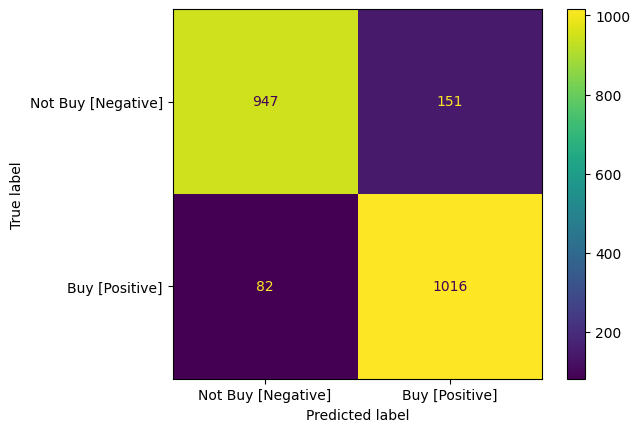

                    precision    recall  f1-score   support

Not Buy [Negative]       0.92      0.86      0.89      1098
    Buy [Positive]       0.87      0.93      0.90      1098

          accuracy                           0.89      2196
         macro avg       0.90      0.89      0.89      2196
      weighted avg       0.90      0.89      0.89      2196

Random Forest Final - Test


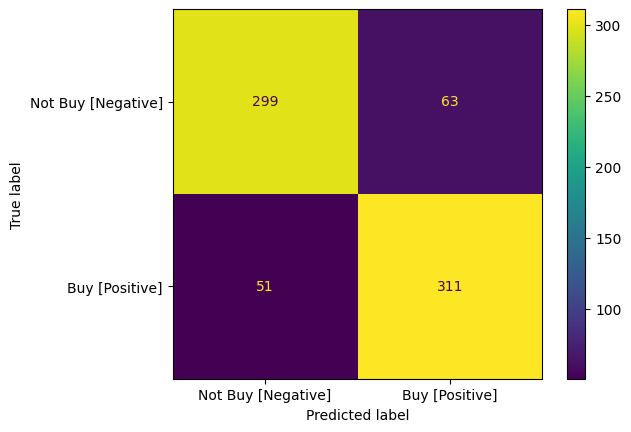

                    precision    recall  f1-score   support

Not Buy [Negative]       0.85      0.83      0.84       362
    Buy [Positive]       0.83      0.86      0.85       362

          accuracy                           0.84       724
         macro avg       0.84      0.84      0.84       724
      weighted avg       0.84      0.84      0.84       724



In [320]:
print('Random Forest Final - Train')
performance_check(rnd_clf_final,X_train_balanced, y_train_balanced, classes)
print('Random Forest Final - Test')
performance_check(rnd_clf_final,X_test_balanced, y_test_balanced, classes)

Insight = in the final model after hyperparameter tuning with cross validation and checking boosting method, we landed upon the model with best estimators from Grid Search CV.

The result is 86% recall on positives and 85% F1-score on positives.

# Pipeline

In [322]:
# Get Numerical Columns and Categorical Columns

num_columns = X_train.drop(['Education','Marital_Status'],axis='columns').columns.tolist()
cat_columns = X_train[['Education','Marital_Status']].columns.tolist()

print('Numerical Columns : ', num_columns)
print('Categorical Columns : ', cat_columns)

Numerical Columns :  ['Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'Complain']
Categorical Columns :  ['Education', 'Marital_Status']


In [323]:
# make cat pipeline

cat_pipeline = make_pipeline(OrdinalEncoder().set_output(transform = 'pandas'))

# make num pipeline

num_pipeline = make_pipeline(MinMaxScaler().set_output(transform = 'pandas'))

#make preprocessing pipeline

preprocessing_pipeline = ColumnTransformer([
    ('pipe_num', num_pipeline, num_columns),
    ('pipe_cat', cat_pipeline, cat_columns)
]).set_output(transform = 'pandas')

# make preprocessing and model pipeline

clf = make_pipeline(preprocessing_pipeline,
    RandomForestClassifier(
    n_estimators = 300, min_samples_split = 2,
    min_samples_leaf = 3, max_leaf_nodes = 20,
    max_depth = 448, random_state=42))

#train pipeline
clf.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipe_num',
                                                  Pipeline(steps=[('minmaxscaler',
                                                                   MinMaxScaler())]),
                                                  ['Income', 'Kidhome',
                                                   'Teenhome', 'Recency',
                                                   'MntWines', 'MntFruits',
                                                   'MntMeatProducts',
                                                   'MntFishProducts',
                                                   'MntSweetProducts',
                                                   'MntGoldProds',
                                                   'NumDealsPurchases',
                                                   'NumWebPurchases',
                                                   'NumCatalogPurchases',
                                                   'NumStorePurchases',
                                                   'Complain']),
                                                 ('pipe_cat',
                                                  Pipeline(steps=[('ordinalencoder',
                                                                   OrdinalEncoder())]),
                                                  ['Education',
                                                   'Marital_Status'])])),
                ('randomforestclassifier',
                 RandomForestClassifier(max_depth=448, max_leaf_nodes=20,
                                        min_samples_leaf=3, n_estimators=300,
                                        random_state=42))])

In [324]:
# Check performance model

y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)

print('Train')
print(classification_report(y_train, y_pred_train))
print('')

print('Test')
print(classification_report(y_test, y_pred_test))

Train
              precision    recall  f1-score   support

           0       0.88      1.00      0.94      1098
           1       0.98      0.24      0.39       198

    accuracy                           0.88      1296
   macro avg       0.93      0.62      0.66      1296
weighted avg       0.89      0.88      0.85      1296


Test
              precision    recall  f1-score   support

           0       0.85      0.99      0.91       362
           1       0.50      0.07      0.12        70

    accuracy                           0.84       432
   macro avg       0.67      0.53      0.52       432
weighted avg       0.79      0.84      0.78       432



Insight = pipeline is successfully created, trained, then tested, though without data balancing. As mentioned prior, imbalanced data leads to poor results in the minority data, with positive recall of train-test being 24% and 7%, f1 score of train-test positive to be 39%-12%.

# Model Saving

In [325]:
with open("model1.pkl", "wb") as f:
    pickle.dump(rnd_clf_final, f)

with open("scaler1.pkl", "wb") as f:
    pickle.dump(scaler, f)

with open("encoder1.pkl", "wb") as f:
    pickle.dump(encoder, f)

# Conclusion

## Key Insights

We tried out several different classification models, such as Known Nearest Neighbors, Support Vector Machine, Decision Tree, and Random Forest.

Upon testing with unbalanced data, the results were very poor, with the models only being able to correctly classify 20ish percent of past buyers.

The data was then balanced, and the model improved. With this balanced data, then it was decided to continue forward using Random Forest model as it was the most capable model for our goal.

After hyperparameter tuning and boosting, we finally settled on the best model so far, being able to correctly classify 86% of all membership buyers in the data.

## Benefits

This machine/model that will classify whether customers are likely to buy membership or not will save the company marketing funds as marketing efforts can be targeted and focused to customers who are predicted to be willing to buy the membership. This way, the company does not have to do marketing to **customers** which, not only time inefficient, it is also labor inefficient, and can be rather costly.

Simply put, this model increase efficiency of the company when it comes to offering membership as the model already funneled down who's likely to buy the membership.

## Recommendation

Business:

Once the customers are classified into people who are likely to buy the membership, it's worth noting that building further relationship with that customer will be important to ensure their loyalty further and increase the chances of them buying the membership. This can be done through special treatment with special coupons, increased in-store interaction with, perhaps with a Customer Relationship Manager or just in-store employees in general--make them feel that they're welcomed, appreciated, and wanted. We can also give gifts, and do other customer relationship techniques on them.


Technical:

- There are still overfitting issues that has not been addresed
- There are still further/deeper feature selection method to do, e.g. testing out whether each feature have statistically significant relationship with the target feature
- Grid Search CV was cut down to a small number of params to save time. Further Grid Search CV can still be done to find the *best* best parameters, not to mention not all parameters are adjusted in Random Search CV and Grid Search CV.
- We have not yet tested if capping the outlier will lead to a better model.
- PCA (Principal Component Analysis) was not done due to concern of PCA simplifying the information too much, we have not yet tried and compared the models if PCA was done beforehand.